In [3]:
!pip install -U sentence-transformers
!pip install faiss-cpu
!pip3 install umap-learn
!pip show pickle
!pip show joblib
!pip show umap-learn
#!pip install lime
#!pip install shap
#!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

Name: joblib
Version: 1.3.2
Summary: Lightweight pipelining with Python functions
Home-page: 
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: imbalanced-learn, librosa, mlxtend, music21, nltk, pynndescent, scikit-learn


Name: umap-learn
Version: 0.5.5
Summary: Uniform Manifold Approximation and Projection
Home-page: http://github.com/lmcinnes/umap
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numba, numpy, pynndescent, scikit-learn, scipy, tqdm
Required-by: 


In [ ]:
import os
import shutil
import subprocess
import urllib.request
import zipfile
from pathlib import Path
import pickle
import sys

import faiss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from matplotlib.colors import ListedColormap
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from umap import UMAP

In [270]:
import shutil
import subprocess
import os
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
import torch
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

from matplotlib.colors import ListedColormap
import warnings

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import Pipeline
import faiss

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
import shutil
import urllib.request
import zipfile
from umap import UMAP
from pathlib import Path

import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [463]:
from src.utils.reco_update import RecoUpdate
del sys.modules['src.utils.reco_update']
from src.utils.reco_update import RecoUpdate

In [464]:
# Add the path to the other directory to the Python path
sys.path.append(os.path.abspath('../'))

In [483]:
from src.configs.config import ModelConfig, PathsConfig
from src.utils.models import Models
from src.utils.plots import Plotter
from src.utils.reco_update import RecoUpdate

In [541]:
del sys.modules['src.configs.config'] 
del sys.modules['src.utils.file_ops'] 
del sys.modules['src.utils.preprocessing_ops']
del sys.modules['src.utils.models']
del sys.modules['src.utils.plots']
del sys.modules['src.utils.reco_update']

In [542]:
from src.configs.config import ModelConfig, PathsConfig
from src.utils.file_ops import FilesOps
from src.utils.preprocessing_ops import PreprocessUtils
from src.utils.models import Models
from src.utils.plots import Plotter
from src.utils.reco_update import RecoUpdate

In [543]:
path  = PathsConfig()
model = ModelConfig()

current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender


In [544]:
FilesOps.download_rename_and_unzip("https://www.dropbox.com/scl/fi/lt7mbtho9d3n9guh9cz2k/coopdata.zip?rlkey=m501w6zggiugila3zps1jfbql&dl=0", 'data.zip')

current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'data.zip'

In [545]:
choco_emb  = PreprocessUtils.preprocess_dataframe(path.choco_data, model.model, 'choco')
drink_emb  = PreprocessUtils.preprocess_dataframe(path.drink_data, model.model, 'drink')
clean_emb  = PreprocessUtils.preprocess_dataframe(path.clean_data, model.model, 'clean')

preprocced_df = PreprocessUtils.concat_dataframe([clean_emb, drink_emb, choco_emb])
preprocced_df = PreprocessUtils.split_embeddings(preprocced_df)

current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender


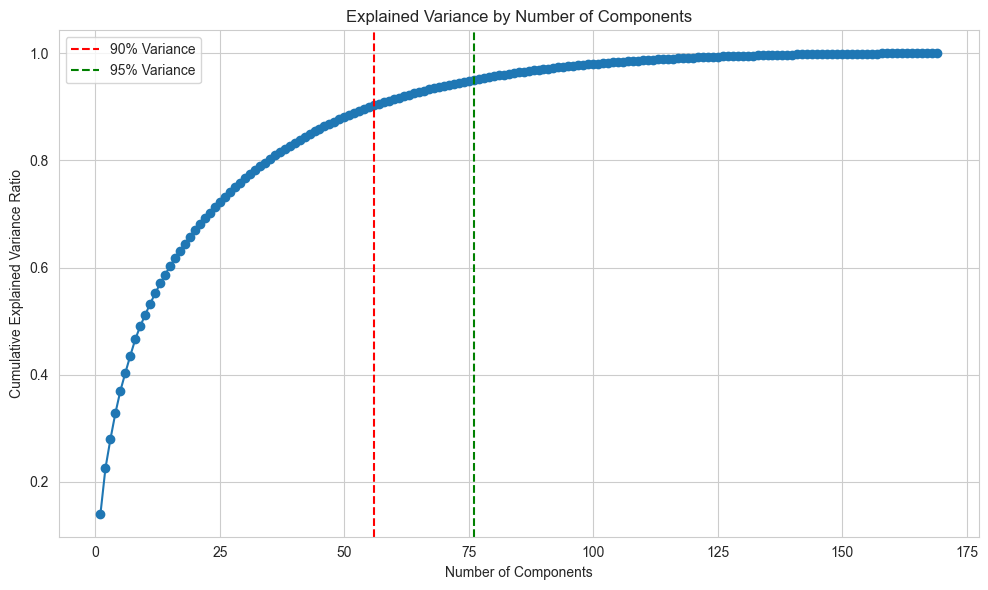

Number of components explaining 90% variance: 56
Number of components explaining 95% variance: 76


In [546]:
models = Models(preprocced_df)

models.check_pca(embedding_prefix='embedding_')

current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender
current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender
current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender
current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender


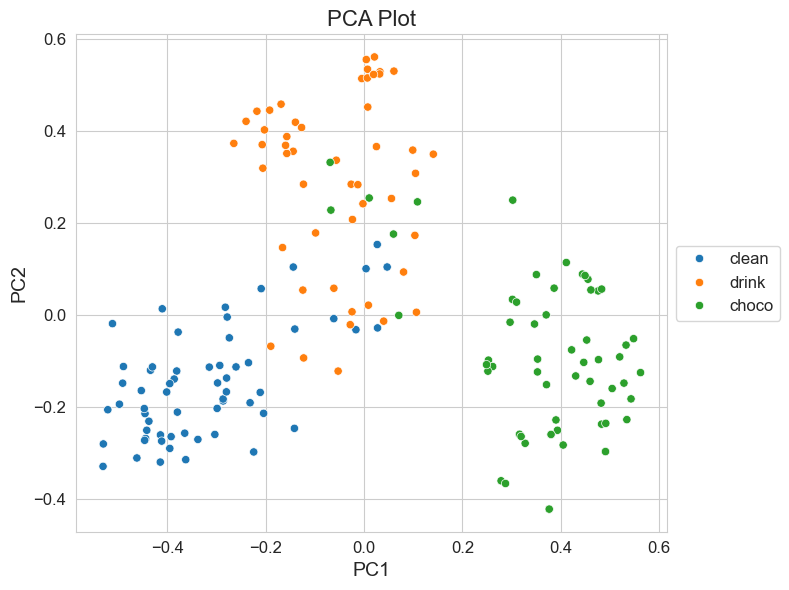

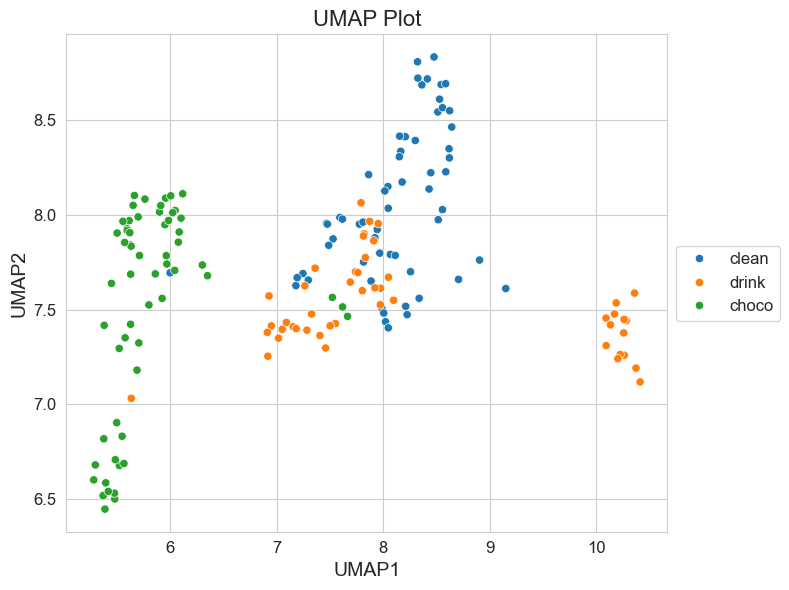

In [547]:
n_components_pca = 6
emb_split_df, _ = models.apply_pca(embedding_prefix='embedding_',n_components=n_components_pca)
Plotter.plot_pca(emb_split_df, filename='pca_'+str(n_components_pca)+'.png')

n_components_umap = 6
emb_split_df, _ = models.apply_umap(embedding_prefix='embedding_',n_components=n_components_umap)
Plotter.plot_umap(emb_split_df, filename='umap_'+str(n_components_pca)+'.png')

current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender


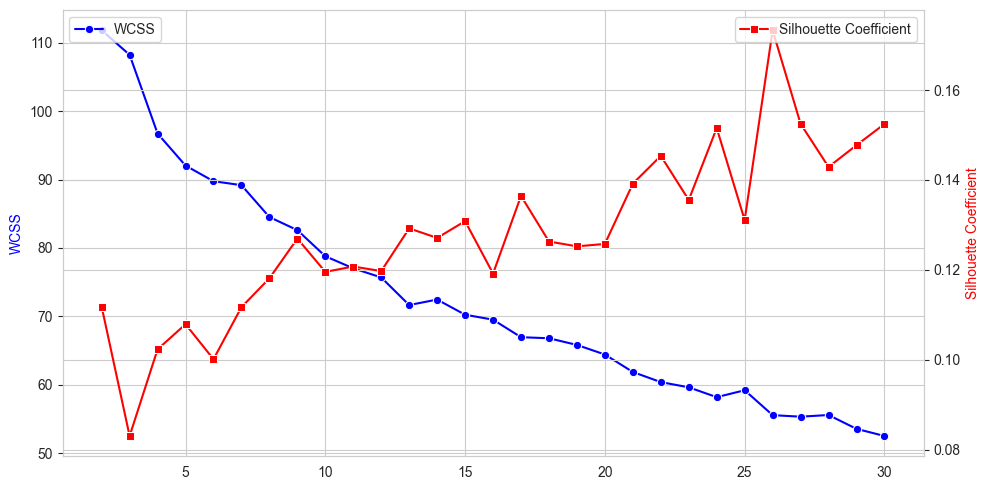

current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender


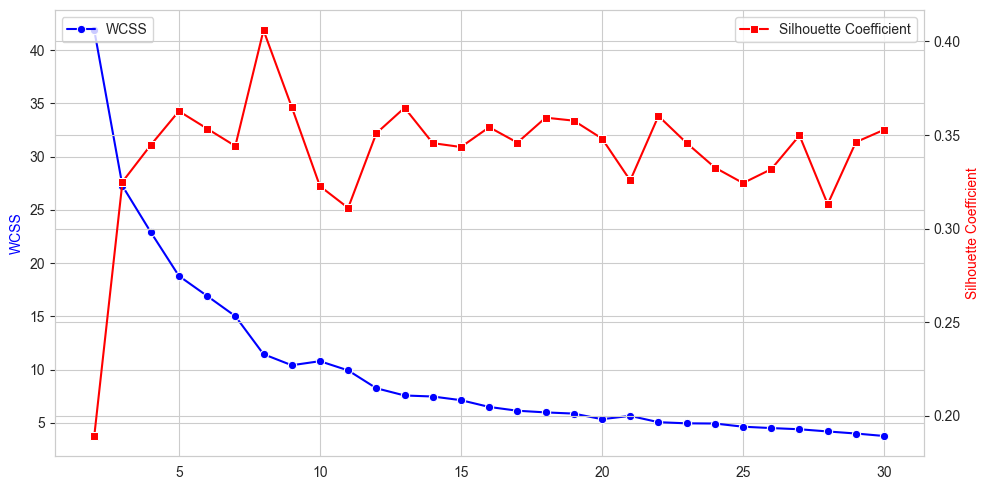

current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender


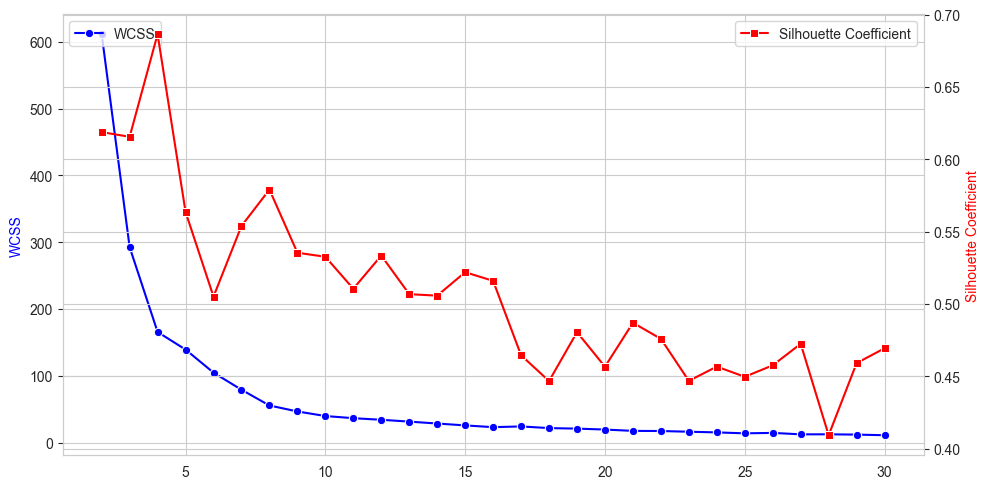

In [548]:
# Case 1
Plotter.cluster_and_plot(min_clusters=2, max_clusters=30, embedding_prefix='embedding_', df=emb_split_df, filename='Silhouette_emb.png')
Plotter.cluster_and_plot(min_clusters=2, max_clusters=30, embedding_prefix='PC', df=emb_split_df, filename='PCA_emb.png')
Plotter.cluster_and_plot(min_clusters=2, max_clusters=30, embedding_prefix='UMAP', df=emb_split_df, filename='UMAP_emb.png')

current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender
current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender
current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender
current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender
current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender
current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender


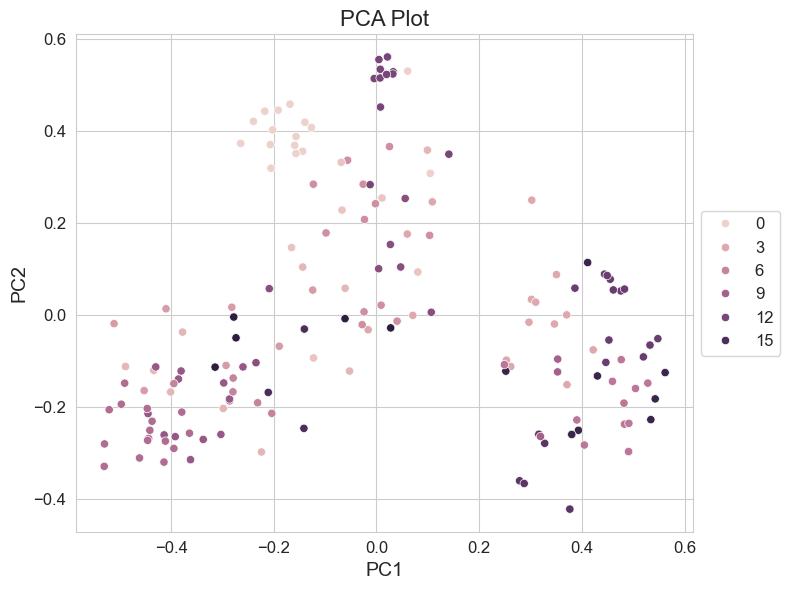

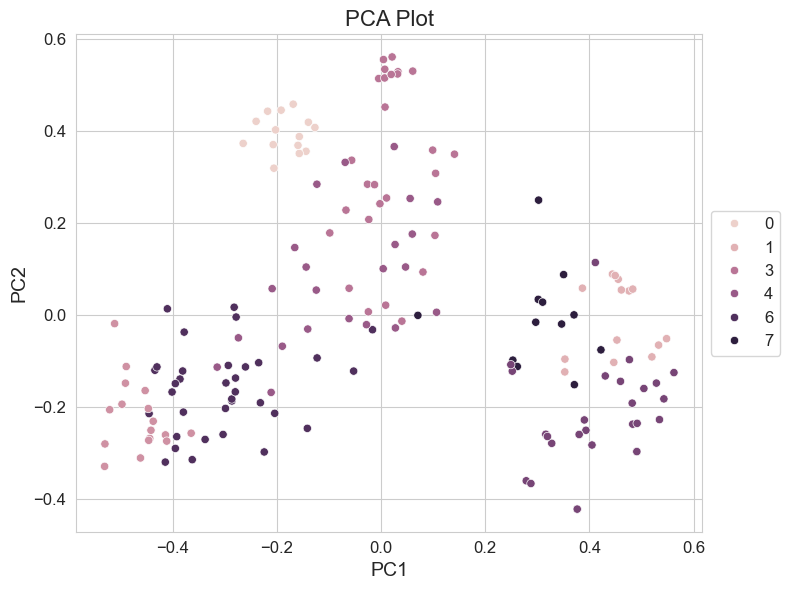

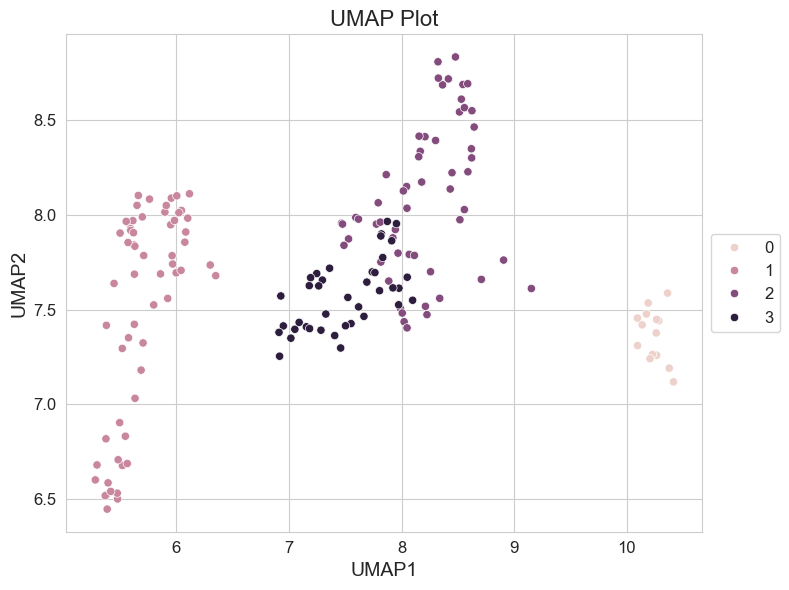

In [549]:
n_cluster = 18
emb_split_df, kmeans_pl = models.cluster_data(embedding_prefix='embedding_', n_clusters=n_cluster)
#Plotter.plot_pca(emb_split_df, ='klabels')
Plotter.plot_pca(emb_split_df, filename='pca_emb_klabels_'+str(n_cluster)+'.png', hue='klabels')

n_cluster_pca = 8
emb_split_df, kmeans_pl = models.cluster_data(embedding_prefix='PC', n_clusters=n_cluster_pca)
Plotter.plot_pca(emb_split_df, filename='pca_PCemb_klabels_'+str(n_cluster)+'.png', hue='klabels')

n_cluster_umap = 4
emb_split_df, kmeans_pl = models.cluster_data(embedding_prefix='UMAP', n_clusters=n_cluster_umap)
Plotter.plot_umap(emb_split_df, filename='umap_UMAPemb_klabels_'+str(n_cluster)+'.png', hue='klabels')

In [550]:
centroid_index = models.get_centroid_indices()
cluster_index_dict = models.save_faiss_index_by_label('UMAP')

In [551]:
reco_update = RecoUpdate()
reco_update.recommend_catalog(query_string='Dettol Sanitizer')['title']

current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender


37          Dettol No-Touch Kids Grapefruit Liquid Soap
25    Dettol No-Touch Kids Lotus & Camomile Liquid S...
1                  Dettol Rejuvenating Liquid Hand Soap
Name: title, dtype: object

In [581]:
title = 'Dettol Liquid hand sanitizer'
typ = 'clean'
quantity = '40gm'
price = 2.0

reco_update.update_catalog(title,typ,quantity,price)

current_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender\notebooks
root_dir:  C:\Users\kbged\Downloads\mlprojects\coop_recommender


In [587]:
reco_update.recommend_catalog(query_string='liquid sanitizer hand')['title']

71    Palmolive Aquarium Liquid Soap Refill
80     FREE - Neo Dolce Gusto Recycling Bag
13                         Dettol Sanitizer
Name: title, dtype: object

In [386]:
reco_update.emb_split_df

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,PC1,PC2,PC3,PC4,PC5,...,embedding_759,embedding_760,embedding_761,embedding_762,embedding_763,embedding_764,embedding_765,embedding_766,embedding_767,klabels
0,10.659595,4.361031,0.577892,5.851681,4.314648,-0.234651,-0.104061,-0.022686,0.198434,0.196820,...,0.013837,-0.073048,-0.031023,0.038748,-0.004718,0.024132,-0.012075,0.010860,-0.062280,2
1,11.091659,3.063561,0.419495,6.301360,2.911301,-0.413841,-0.320306,0.003260,0.011264,-0.087204,...,-0.042205,0.037327,-0.017343,-0.013626,-0.014446,-0.096496,-0.075888,0.060928,0.009761,4
2,11.027950,3.154022,0.707879,5.771977,3.158356,-0.530236,-0.329621,-0.071859,-0.177189,-0.155278,...,-0.075834,-0.009748,-0.032487,0.056485,-0.036832,0.021576,-0.042900,0.018581,-0.016251,4
3,10.340965,4.664549,0.821930,5.902968,4.384701,0.027649,-0.028374,-0.115594,0.209101,0.479782,...,-0.017373,0.040874,-0.008355,-0.028164,0.032239,0.059915,0.032538,0.021711,-0.000753,2
4,11.343935,3.144587,0.737860,6.100658,2.951212,-0.488782,-0.112367,0.072868,-0.174327,-0.104581,...,-0.066211,-0.015582,-0.008153,0.041430,-0.024517,-0.018042,-0.023084,0.014356,0.028327,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,8.036895,7.004026,2.452166,5.929151,4.684780,0.346531,-0.019913,-0.461459,-0.036896,0.186595,...,0.002931,0.009657,-0.045726,-0.034924,-0.007175,-0.038470,0.073859,0.012738,0.015418,1
165,6.742811,7.143390,3.267560,6.312667,4.465855,0.532580,-0.065709,-0.033361,-0.130819,0.043083,...,-0.006139,0.001905,0.028176,-0.043436,0.000220,-0.033043,0.044048,0.044025,0.033177,1
166,6.524048,7.643324,3.166714,6.027913,4.230797,0.251869,-0.122434,0.051284,0.135725,-0.054809,...,-0.039063,-0.005020,-0.022769,0.087848,0.010475,0.009654,0.014418,-0.006651,-0.014327,1
167,6.824885,6.831774,3.432479,6.673193,4.437040,0.452652,-0.054734,0.081784,-0.045687,0.111262,...,-0.014513,0.008043,-0.003072,0.029806,0.029406,-0.023624,0.048817,0.048127,-0.016724,1


In [317]:
xx['content']

5     well Almond & honey cream soap Refill.Price is...
27    Naturaline liquid soap Sea salt & lotus blosso...
36    well Vanilla & coconut cream soap Refill.Price...
Name: content, dtype: object

In [269]:
models.get_centroid_indices()
models.save_faiss_index_by_label('UMAP')

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x0000021B0EBE1500> >

{2: <faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x0000021B1121D350> >,
 4: <faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x0000021B10D52C10> >,
 5: <faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x0000021B10D52EB0> >,
 1: <faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x0000021B10D52730> >,
 0: <faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x0000021B10D526D0> >,
 3: <faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x0000021B10D53540> >}

In [ ]:
centroid_index = get_centroid_indices(kmeans_pl)
cluster_index_dict = save_faiss_index_by_label(emb_split_df, 'UMAP')
find_nearest_cluster(centroid_index, cluster_index_dict, umap_pl, query_string='chocolate', model=model, emb_split_df=emb_split_df)

In [ ]:
get_centroid_indices()

n_components_pca = 6

emb_split_df, pca_pl = apply_pca(emb_split_df, embedding_prefix='embedding_', n_components=n_components_pca)
plot_pca(emb_split_df, hue='type')

emb_split_df, umap_pl = apply_umap(emb_split_df, embedding_prefix='embedding_', n_components=n_components_pca)
plot_umap(emb_split_df, hue='type')

In [ ]:
for i in [choco,clean,drink]:
  get_column_info(i)

In [ ]:
choco = pd.read_csv('../data/coopdata/choco.csv')
choco.head(2)

clean = pd.read_csv('../data/coopdata/clean.csv')
clean.head(2)

drink = pd.read_csv('../data/coopdata/drink.csv')
drink.head(2)

for i in [choco,clean,drink]:
  get_column_info(i)

model = SentenceTransformer("all-distilroberta-v1")

choco_emb = preprocess_dataframe(choco, model, 'choco')
drink_emb = preprocess_dataframe(drink, model, 'drink')
clean_emb = preprocess_dataframe(clean, model, 'clean')

emb_split_df = pd.concat([clean_emb, drink_emb, choco_emb], axis=0)
emb_split_df.reset_index(drop=True,inplace=True)

emb_df = emb_split_df['embedding'].apply(pd.Series).add_prefix('embedding_')
emb_split_df = pd.concat([emb_df, emb_split_df], axis=1)
emb_split_df

In [6]:
class ModelConfig():
    def _init__(self):
        

class PathsConfig():
    def __init__(self):
        self.data_url = 'https://www.dropbox.com/scl/fi/lt7mbtho9d3n9guh9cz2k/coopdata.zip?rlkey=m501w6zggiugila3zps1jfbql&dl=0'
        self.rename_data_zip = 'data.zip'
        self.current_dir = Path.cwd()
        self.root_dir = self.root_dir.parent
        self.data_dir =  self.root_dir.joinpath('data')
        self.data_folder = [folder for folder in os.listdir(self.data_dir) if os.path.isdir(os.path.join(self.data_dir, folder))][0]
        self.choco_data =  self.data_dir.joinpath(self.data_folder).joinpath('choco.csv')
        self.clean_data =  self.data_dir.joinpath(self.data_folder).joinpath('clean.csv')
        self.drink_data =  self.data_dir.joinpath(self.data_folder).joinpath('drink.csv')


IndentationError: expected an indented block after function definition on line 2 (3858901393.py, line 5)

In [5]:
def download_rename_and_unzip(url, new_name, data_dir='./'):
    # Download the zip file
    #urllib.request.urlretrieve(url,'data.zip')
    subprocess.run(["wget", url])

    files = [i for i in os.listdir("./") if 'zip' in i]

    # Move the downloaded file with the new name
    shutil.move(files[0], new_name)

    # Unzip the file
    with zipfile.ZipFile(new_name, 'r') as zip_ref:
        zip_ref.extractall(data_dir)

    # Delete the zip file
    os.remove(new_name)

def get_column_info(df):
    # Calculate null values, total values, and column types for each column
    null_values = df.isnull().sum()
    total_values = df.shape[0]
    column_types = df.dtypes

    # Create a new DataFrame with column names, null values, total values, and column types
    result_df = pd.DataFrame({
        'Column Name': null_values.index,
        'Null Values': null_values.values,
        'Total Values': [total_values] * len(null_values),
        'Column Type': [str(x) for x in column_types]
    })

    return result_df

def preprocess_dataframe(df, model, name):
    # Drop rows where 'title' is missing
    df = df.dropna(subset=['title'])

    # Add 'type' column
    df.loc[:,'type'] = name

    # Extract 'rate' and 'votes' columns from 'rating' column
    df.loc[:,'rate'] = df['rating'].str.extract(r'Rated  of (\d+)')
    df.loc[:,'votes'] = df['rating'].str.extract(r'\((\d+)\)')

    # Format 'price' column
    if df.price.dtype=='object':
      df['price'] = df['price'].str.extract(r'(\d+\.?\d*)').astype(float)
      #print(df['price'])
    df.loc[:,'price_str'] = df['price'].apply(lambda x: f'Price is {x:.2f}')

    # Combine 'title' and 'price' columns into 'content' column
    df.loc[:,'content'] = df['title'].astype(str) + '.' + df['price_str']

    # Encode 'title' column and store in 'embedding' column
    df.loc[:,'embedding'] = df['title'].apply(lambda x: model.encode(str(x)))

    return df

def cluster_and_plot(min_clusters, max_clusters, embedding_prefix, df):
    embedding_columns = [col for col in df.columns if col.startswith(embedding_prefix)]

    wcss = []
    silhouette_scores = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, max_iter=50)
        kmeans.fit(df.loc[:, embedding_columns])

        # Within-cluster sum of squares
        wcss.append(kmeans.inertia_)

        # Silhouette score
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(df.loc[:, embedding_columns], cluster_labels)
        silhouette_scores.append(silhouette_avg)
        #print("For n_clusters={}, the silhouette score is {:.4f}".format(n_clusters, silhouette_avg))

    # Plotting
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 5))

    # WCSS plot
    ax1 = sns.lineplot(x=range(min_clusters, max_clusters + 1), y=wcss, label='WCSS', marker='o', color='b')
    ax1.set_ylabel('WCSS', color='b')

    # Silhouette score plot
    ax2 = ax1.twinx()
    sns.lineplot(x=range(min_clusters, max_clusters + 1), y=silhouette_scores, label='Silhouette Coefficient', marker='s', color='r')
    ax2.set_ylabel('Silhouette Coefficient', color='r')

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show the plot
    plt.show()

def apply_pca(df, embedding_prefix, n_components):
    # Select embedding columns
    embedding_columns = [col for col in df.columns if col.startswith(embedding_prefix)]

    # Define the PCA pipeline
    pl = Pipeline(steps=[
        #('scaler', StandardScaler()),
        ('clf', PCA(n_components=n_components,random_state=42))
    ])

    # Apply PCA and create a DataFrame with the transformed columns
    pca_df = pd.DataFrame(pl.fit_transform(df.loc[:, embedding_columns]), columns=[f'PC{i}' for i in range(1, n_components + 1)])

    # Concatenate the PCA-transformed columns with the original DataFrame
    df = pd.concat([pca_df, df], axis=1)

    return df, pl

def plot_pca(df, hue='type'):
    #hue can be klabels

    # Create figure and axes
    fig, axes = plt.subplots(1, 1, figsize=(8, 6))
    plt.subplots_adjust(right=2.5, top=1.25)

    # Plot PCA components
    sns.scatterplot(x='PC1', y='PC2', data=df, hue=hue, ax=axes)

    # Set title and axis labels with increased font size
    axes.set_title('PCA Plot', fontsize=16)
    axes.set_xlabel('PC1', fontsize=14)
    axes.set_ylabel('PC2', fontsize=14)

    # Increase font size of legend
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    # Increase font size of ticks
    axes.tick_params(axis='both', which='major', labelsize=12)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def apply_umap(df, embedding_prefix, n_components):
    # Select embedding columns
    embedding_columns = [col for col in df.columns if col.startswith(embedding_prefix)]

    # Define the UMAP pipeline
    pl_umap = Pipeline(steps=[
        ('clf', UMAP(n_components=n_components,random_state=42))
    ])

    # Apply UMAP and create a DataFrame with the transformed columns
    umap_df = pd.DataFrame(pl_umap.fit_transform(df.loc[:, embedding_columns]), columns=[f'UMAP{i}' for i in range(1, n_components + 1)])

    # Concatenate the UMAP-transformed columns with the original DataFrame
    df = pd.concat([umap_df, df], axis=1)

    return df, pl_umap

def plot_umap(df, hue='type'):
    # Create figure and axes
    fig, axes = plt.subplots(1, 1, figsize=(8, 6))
    plt.subplots_adjust(right=2.5, top=1.25)

    # Plot UMAP components
    sns.scatterplot(x='UMAP1', y='UMAP2', data=df, hue=hue, ax=axes)

    # Set title and axis labels with increased font size
    axes.set_title('UMAP Plot', fontsize=16)
    axes.set_xlabel('UMAP1', fontsize=14)
    axes.set_ylabel('UMAP2', fontsize=14)

    # Increase font size of legend
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    # Increase font size of ticks
    axes.tick_params(axis='both', which='major', labelsize=12)

    plt.show()

def cluster_data(df, embedding_prefix, n_clusters):
    # Select embedding columns
    embedding_columns = [col for col in df.columns if col.startswith(embedding_prefix)]

    # Define the KMeans pipeline
    plkmeans = Pipeline(steps=[
        #('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=n_clusters, init='k-means++',random_state=42))
    ])

    # Fit KMeans to the embedding columns
    plkmeans.fit(df.loc[:, embedding_columns])

    # Predict cluster labels
    cluster_labels = plkmeans.predict(df.loc[:, embedding_columns])

    # Add cluster labels to the DataFrame
    df['klabels'] = cluster_labels

    return df, plkmeans

def get_centroid_indices(kmeans_pipeline):
    # Get the centroids of each cluster
    centroids = kmeans_pipeline.named_steps['kmeans'].cluster_centers_

    # Convert centroids to float32 (required by FAISS)
    centroids = centroids.astype(np.float32)

    # Create a DataFrame with labels and corresponding centroids
    centroids_df = pd.DataFrame({'Centroid': centroids.tolist()})

    # Initialize FAISS index
    index_dim = centroids.shape[1]
    index = faiss.IndexFlatL2(index_dim)

    # Add centroids to FAISS index
    index.add(centroids)

    return index

def save_faiss_index_by_label(df, embedding_startswith):
    index_dict = {}

    # Get unique labels from the 'klabels' column
    unique_labels = df['klabels'].unique()

    # Iterate over unique labels
    for label in unique_labels:
        # Filter the DataFrame for the current label
        filtered_df = df[df['klabels'] == label]

        # Filter columns with names starting with the specified prefix
        embedding_columns = [col for col in filtered_df.columns if col.startswith(embedding_startswith)]

        # Convert filtered DataFrame to numpy array
        embeddings = filtered_df[embedding_columns].values.astype('float32')

        # Initialize FAISS index
        index = faiss.IndexFlatL2(embeddings.shape[1])  # Assuming the embedding vectors have the same dimension

        # Add embeddings to the index
        index.add(embeddings)

        # Save the index to the dictionary
        index_dict[label] = index

    return index_dict

def find_nearest_cluster(centroid_index, cluster_index_dict, dim_reduction_pipeline, query_string, model, emb_split_df):
    # Encode the query string using the model
    query = model.encode(query_string, convert_to_tensor=True)
    print(query[:5])
    # Convert query point to numpy array and float32 (required by FAISS)
    query_point = query.numpy().astype(np.float32)

    # Transform query point using PCA pipeline
    query_point_pca = dim_reduction_pipeline.named_steps['clf'].transform(query_point.reshape(1, -1))
    print(query_point_pca)

    # Perform nearest neighbor search
    _, nearest_centroid_index = centroid_index.search(query_point_pca, k=1)
    _, nearest_cluster_index = cluster_index_dict[nearest_centroid_index[0][0]].search(query_point_pca, k=3)

    # Get the indices of recommended rows
    recommended_indices = nearest_cluster_index[0].tolist()

    # Retrieve recommended rows from the DataFrame
    recommended_rows = emb_split_df.loc[emb_split_df['klabels'] == nearest_centroid_index[0][0]].iloc[recommended_indices]

    return recommended_rows

def save_df(df, filename, file_format='csv'):
    if file_format == 'csv':
        # Save DataFrame to CSV file
        df.to_csv(filename, index=False)
    elif file_format == 'pickle':
        # Save DataFrame to pickle file
        df.to_pickle(filename)
    else:
        raise ValueError("Invalid file format. Choose either 'csv' or 'pickle'.")

    return filename


In [8]:
download_rename_and_unzip("https://www.dropbox.com/scl/fi/lt7mbtho9d3n9guh9cz2k/coopdata.zip?rlkey=m501w6zggiugila3zps1jfbql&dl=0", 'data.zip')

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [12]:
choco = pd.read_csv('../data/coopdata/choco.csv')
choco.head(2)

clean = pd.read_csv('../data/coopdata/clean.csv')
clean.head(2)

drink = pd.read_csv('../data/coopdata/drink.csv')
drink.head(2)

for i in [choco,clean,drink]:
  get_column_info(i)

model = SentenceTransformer("all-distilroberta-v1")

choco_emb = preprocess_dataframe(choco, model, 'choco')
drink_emb = preprocess_dataframe(drink, model, 'drink')
clean_emb = preprocess_dataframe(clean, model, 'clean')

emb_split_df = pd.concat([clean_emb, drink_emb, choco_emb], axis=0)
emb_split_df.reset_index(drop=True,inplace=True)

emb_df = emb_split_df['embedding'].apply(pd.Series).add_prefix('embedding_')
emb_split_df = pd.concat([emb_df, emb_split_df], axis=1)
emb_split_df

,web-scraper-order,web-scraper-start-url,title,price,rating,quantity
0,1708455255-1,https://www.coop.ch/en/food/sweets-snacks/choc...,Lindt Lindor Pistachio,9.95,Rated of 5\n \n \n \n \n \n (7),200g
1,1708455255-2,https://www.coop.ch/en/food/sweets-snacks/choc...,Lindt Mini Pralinés Assorted,7.50,Rated of 5\n \n \n \n \n \n (15),100g


,web-scraper-order,web-scraper-start-url,title,quantity,price,rating
0,1708456208-1,https://www.coop.ch/en/cosmetics-health/body-c...,Dove Deo Spray Original,150ml,4.95,Rated of 5\n \n \n \n \n \n (6)
1,1708456208-2,https://www.coop.ch/en/cosmetics-health/body-c...,Dettol Rejuvenating Liquid Hand Soap,250ml,4.20,Rated of 5\n \n \n \n \n \n (8)


,web-scraper-order,web-scraper-start-url,title,rating,quantity,price
0,1708457095-1,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Prix Garantie Natural Mineral Water 6x1.5l,Rated of 5\n \n \n \n \n \n (63),9l,1.80
1,1708457095-2,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola Zero 6x1.5l,Rated of 5\n \n \n \n \n \n (...,9l,14.10


,Column Name,Null Values,Total Values,Column Type
0,web-scraper-order,0,60,object
1,web-scraper-start-url,0,60,object
2,title,0,60,object
3,price,0,60,float64
4,rating,0,60,object
5,quantity,0,60,object


,Column Name,Null Values,Total Values,Column Type
0,web-scraper-order,0,60,object
1,web-scraper-start-url,0,60,object
2,title,0,60,object
3,quantity,0,60,object
4,price,0,60,float64
5,rating,0,60,object


,Column Name,Null Values,Total Values,Column Type
0,web-scraper-order,0,55,object
1,web-scraper-start-url,0,55,object
2,title,6,55,object
3,rating,0,55,object
4,quantity,0,55,object
5,price,0,55,object


,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,title,quantity,price,rating,type,rate,votes,price_str,content,embedding
0,0.011071,0.010229,-0.002758,-0.040556,0.000272,0.060706,0.005447,0.040574,0.027655,-0.027205,...,Dove Deo Spray Original,150ml,4.95,Rated of 5\n \n \n \n \n \n (6),clean,5,6,Price is 4.95,Dove Deo Spray Original.Price is 4.95,"[0.011071006, 0.01022901, -0.002757789, -0.040..."
1,0.017536,-0.028558,-0.001143,-0.038499,0.015833,0.063635,-0.020050,0.014970,-0.065582,-0.000016,...,Dettol Rejuvenating Liquid Hand Soap,250ml,4.20,Rated of 5\n \n \n \n \n \n (8),clean,5,8,Price is 4.20,Dettol Rejuvenating Liquid Hand Soap.Price is ...,"[0.017535735, -0.028558237, -0.001143235, -0.0..."
2,0.051864,-0.036049,0.007431,-0.120294,0.024002,0.010234,-0.004921,0.060287,-0.036749,0.019115,...,Dove Beauty Cream Wash Liquid Soap Refill,500ml,4.90,Rated of 5\n \n \n \n \n \n (29),clean,5,29,Price is 4.90,Dove Beauty Cream Wash Liquid Soap Refill.Pric...,"[0.051863637, -0.036048878, 0.007431077, -0.12..."
3,0.003740,-0.034548,-0.022952,-0.021453,0.007299,0.044152,0.016801,0.044387,-0.019962,-0.023334,...,Axe Duschgel Black,250ml,3.50,Rated of 5\n \n \n \n \n \n (11),clean,5,11,Price is 3.50,Axe Duschgel Black.Price is 3.50,"[0.003739672, -0.034547813, -0.022952126, -0.0..."
4,0.020342,-0.037786,-0.035025,-0.084351,0.009353,0.019974,-0.006787,0.021542,0.000747,-0.033983,...,Prix Garantie Liquid Soap Refill,1000ml,1.80,Rated of 5\n \n \n \n \n \n (46),clean,5,46,Price is 1.80,Prix Garantie Liquid Soap Refill.Price is 1.80,"[0.020342167, -0.03778634, -0.035024535, -0.08..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,-0.052053,0.009192,-0.022590,-0.028895,0.034786,0.076101,0.012002,0.061591,0.019202,0.012680,...,Halba Chocolate Bar Dark Pistachios,100g,2.40,Rated of 5\n \n \n \n \n \n (27),choco,5,27,Price is 2.40,Halba Chocolate Bar Dark Pistachios.Price is 2.40,"[-0.052052986, 0.009192401, -0.022590341, -0.0..."
165,-0.044504,-0.002843,-0.025215,-0.043849,0.002408,0.053890,0.009167,0.009117,0.039885,-0.006036,...,Lindt Excellence Dark Chilli Bar,100g,3.20,Rated of 5\n \n \n \n \n \n (33),choco,5,33,Price is 3.20,Lindt Excellence Dark Chilli Bar.Price is 3.20,"[-0.044503987, -0.0028433744, -0.025214886, -0..."
166,-0.022080,0.001314,0.009630,0.057783,-0.001260,0.087049,0.011064,0.074669,0.006945,0.029708,...,Lindt Sensation Fruit Dark Rasperry & Cranberry,150g,4.95,Rated of 5\n \n \n \n \n \n (23),choco,5,23,Price is 4.95,Lindt Sensation Fruit Dark Rasperry & Cranberr...,"[-0.022079546, 0.0013136303, 0.009629987, 0.05..."
167,-0.039089,-0.020394,-0.027075,-0.013057,0.041468,0.080469,0.025939,0.002946,-0.018352,-0.025293,...,Lindt Crémant Dark 49% Bar,100g,2.50,Rated of 5\n \n \n \n \n \n (6),choco,5,6,Price is 2.50,Lindt Crémant Dark 49% Bar.Price is 2.50,"[-0.03908867, -0.02039353, -0.027074657, -0.01..."


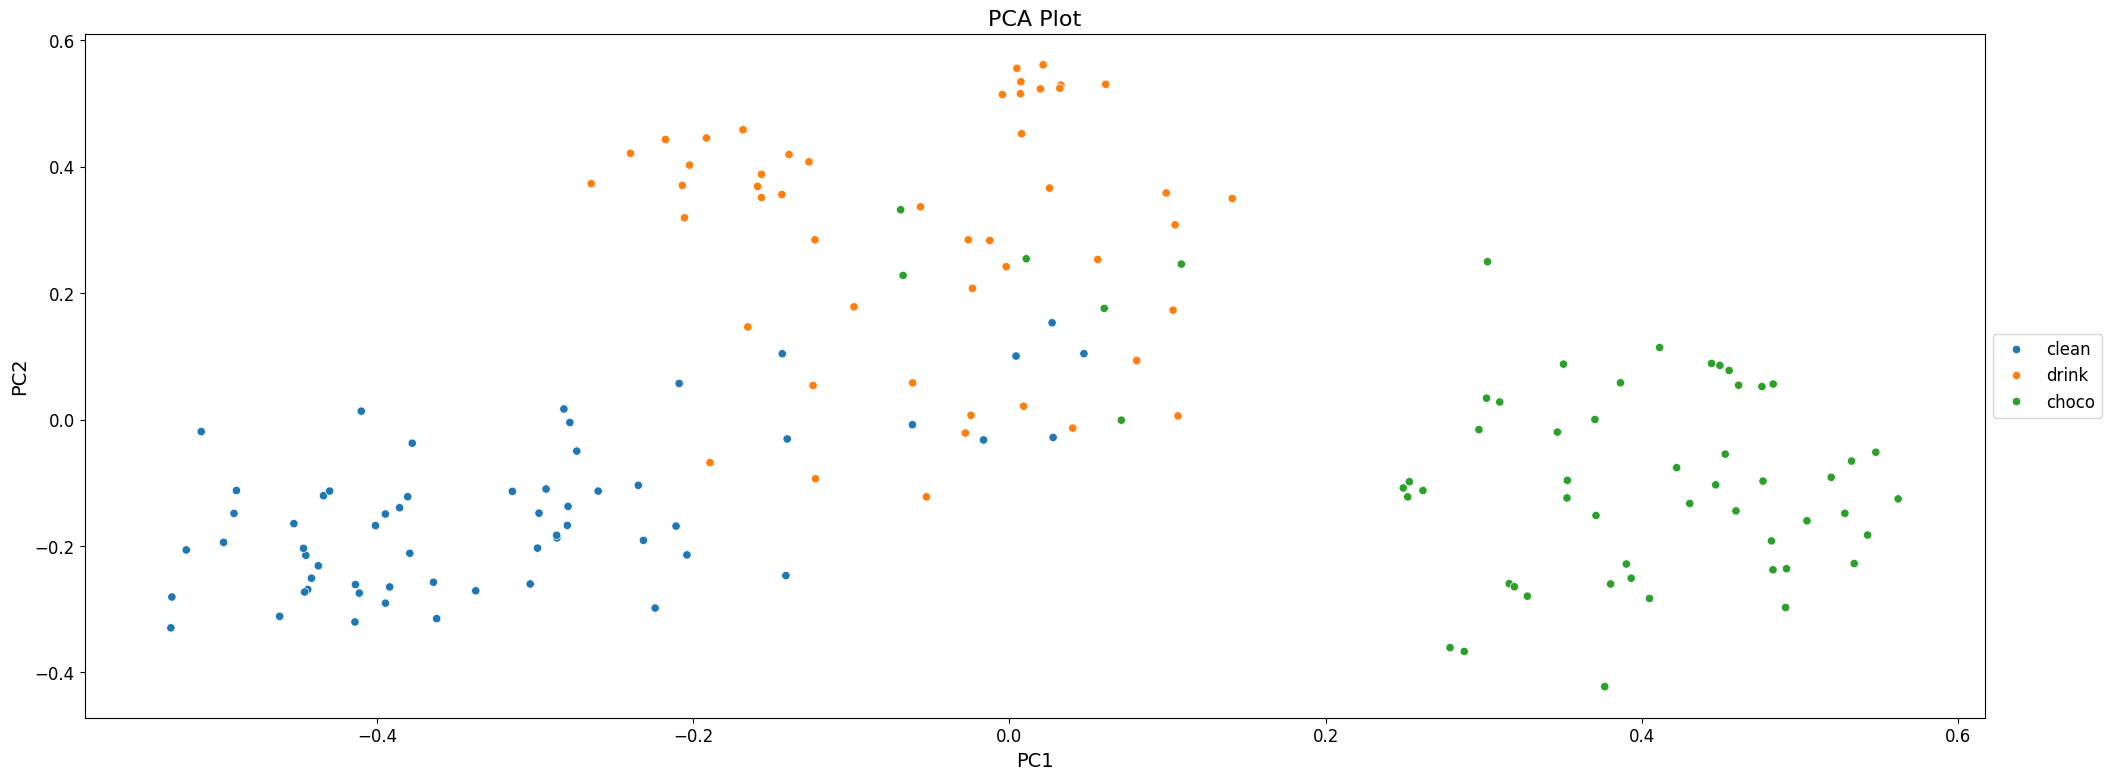

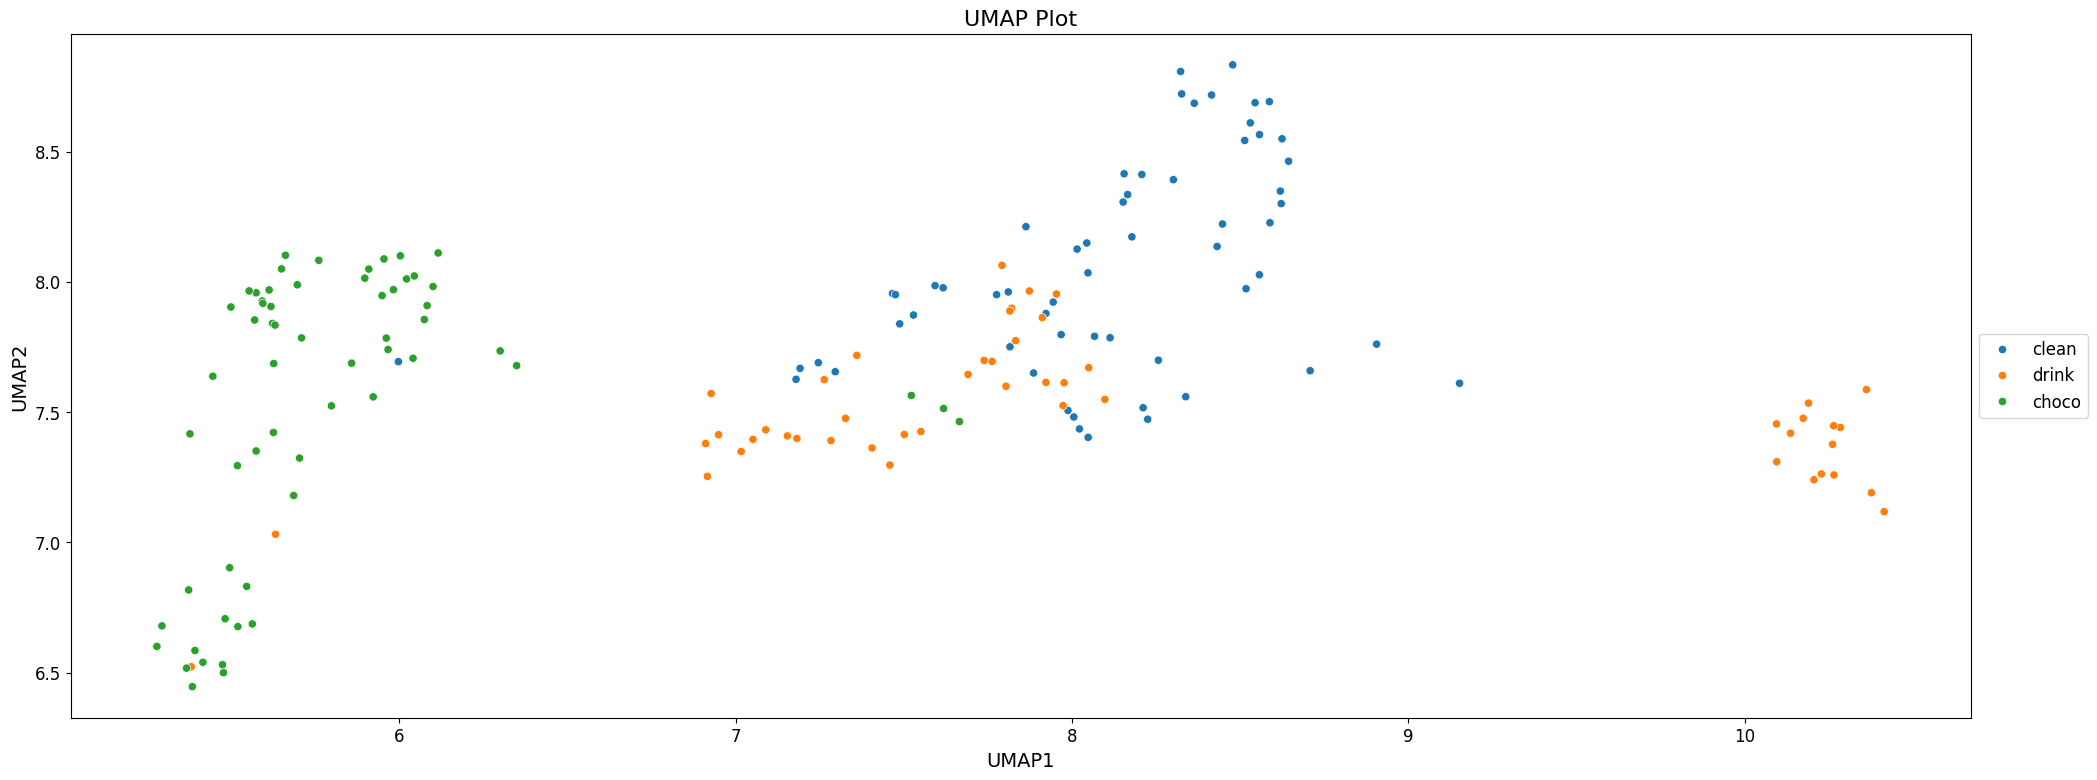

In [13]:
n_components_pca = 6

emb_split_df, pca_pl = apply_pca(emb_split_df, embedding_prefix='embedding_', n_components=n_components_pca)
plot_pca(emb_split_df, hue='type')

emb_split_df, umap_pl = apply_umap(emb_split_df, embedding_prefix='embedding_', n_components=n_components_pca)
plot_umap(emb_split_df, hue='type')

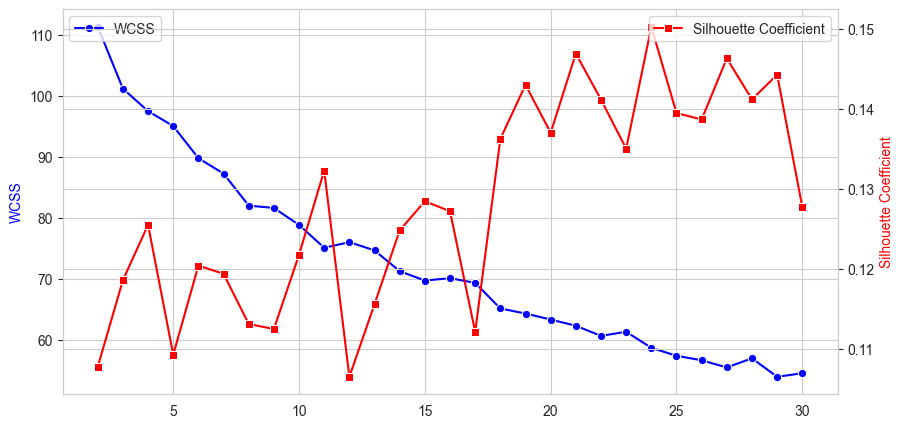

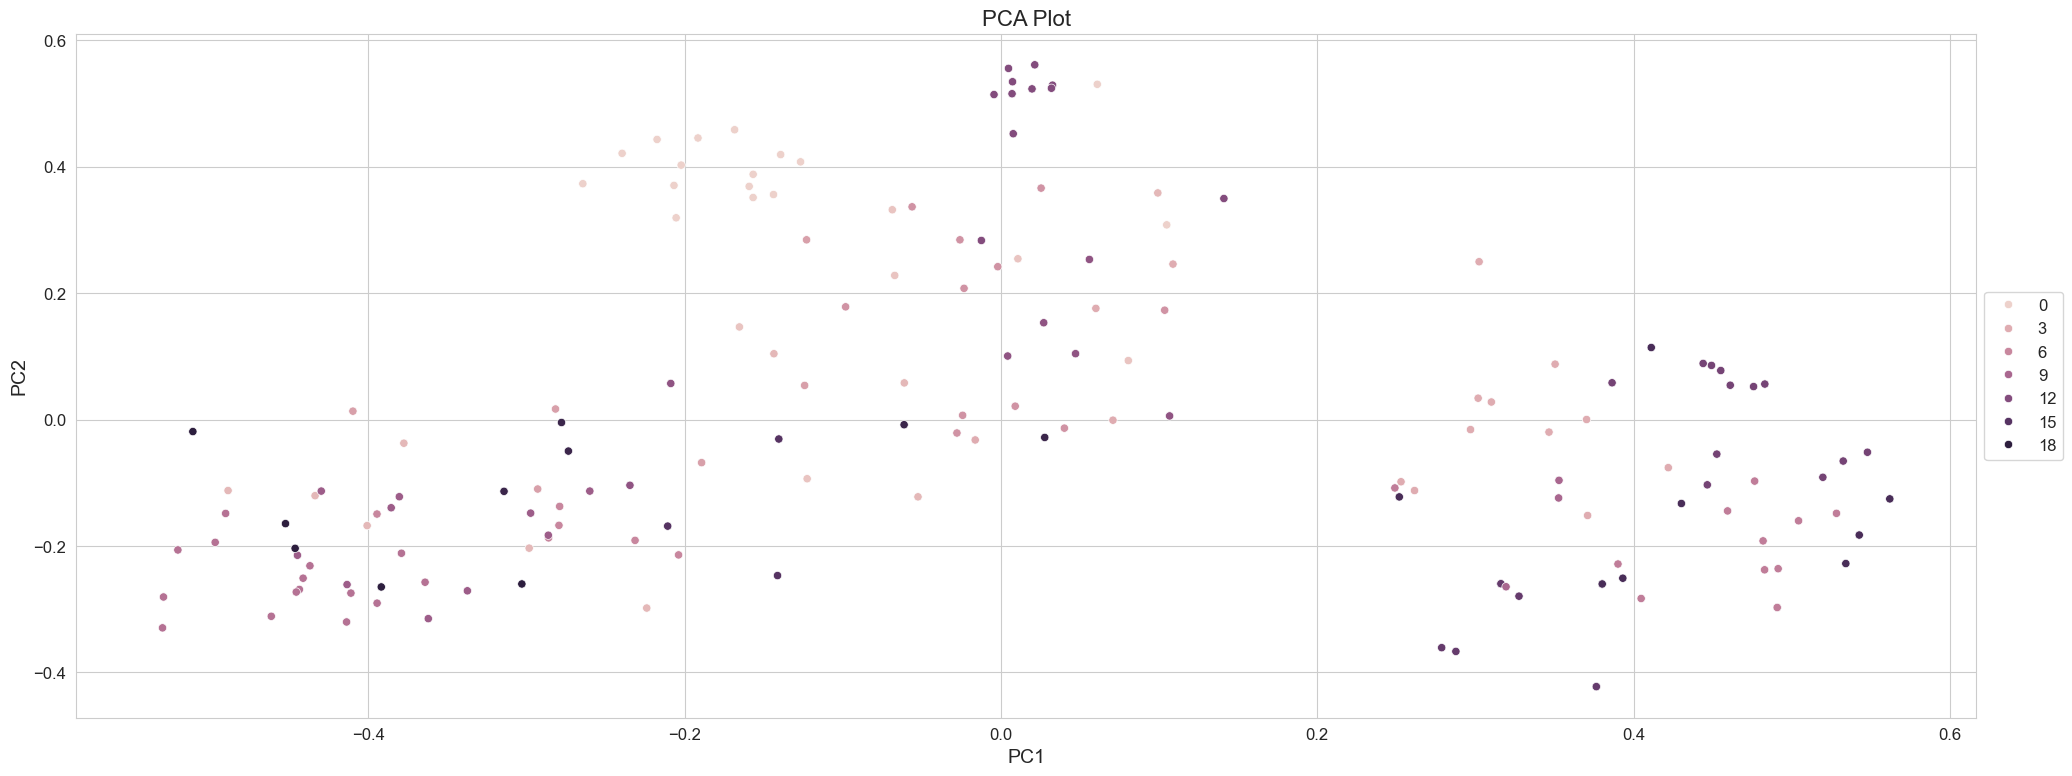

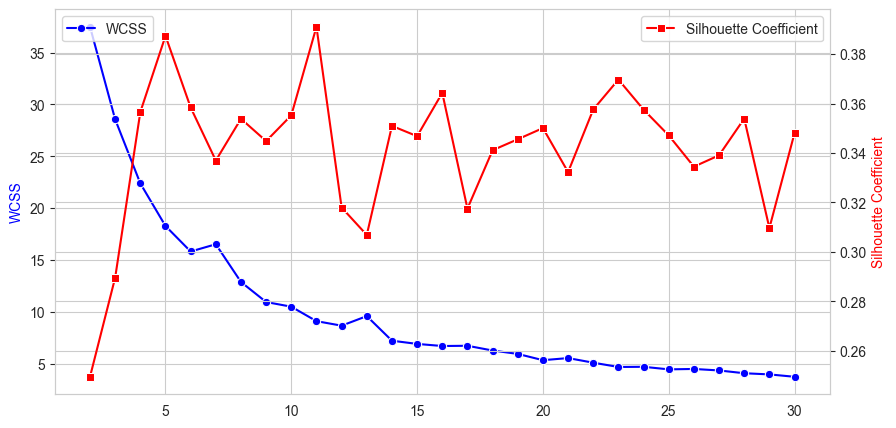

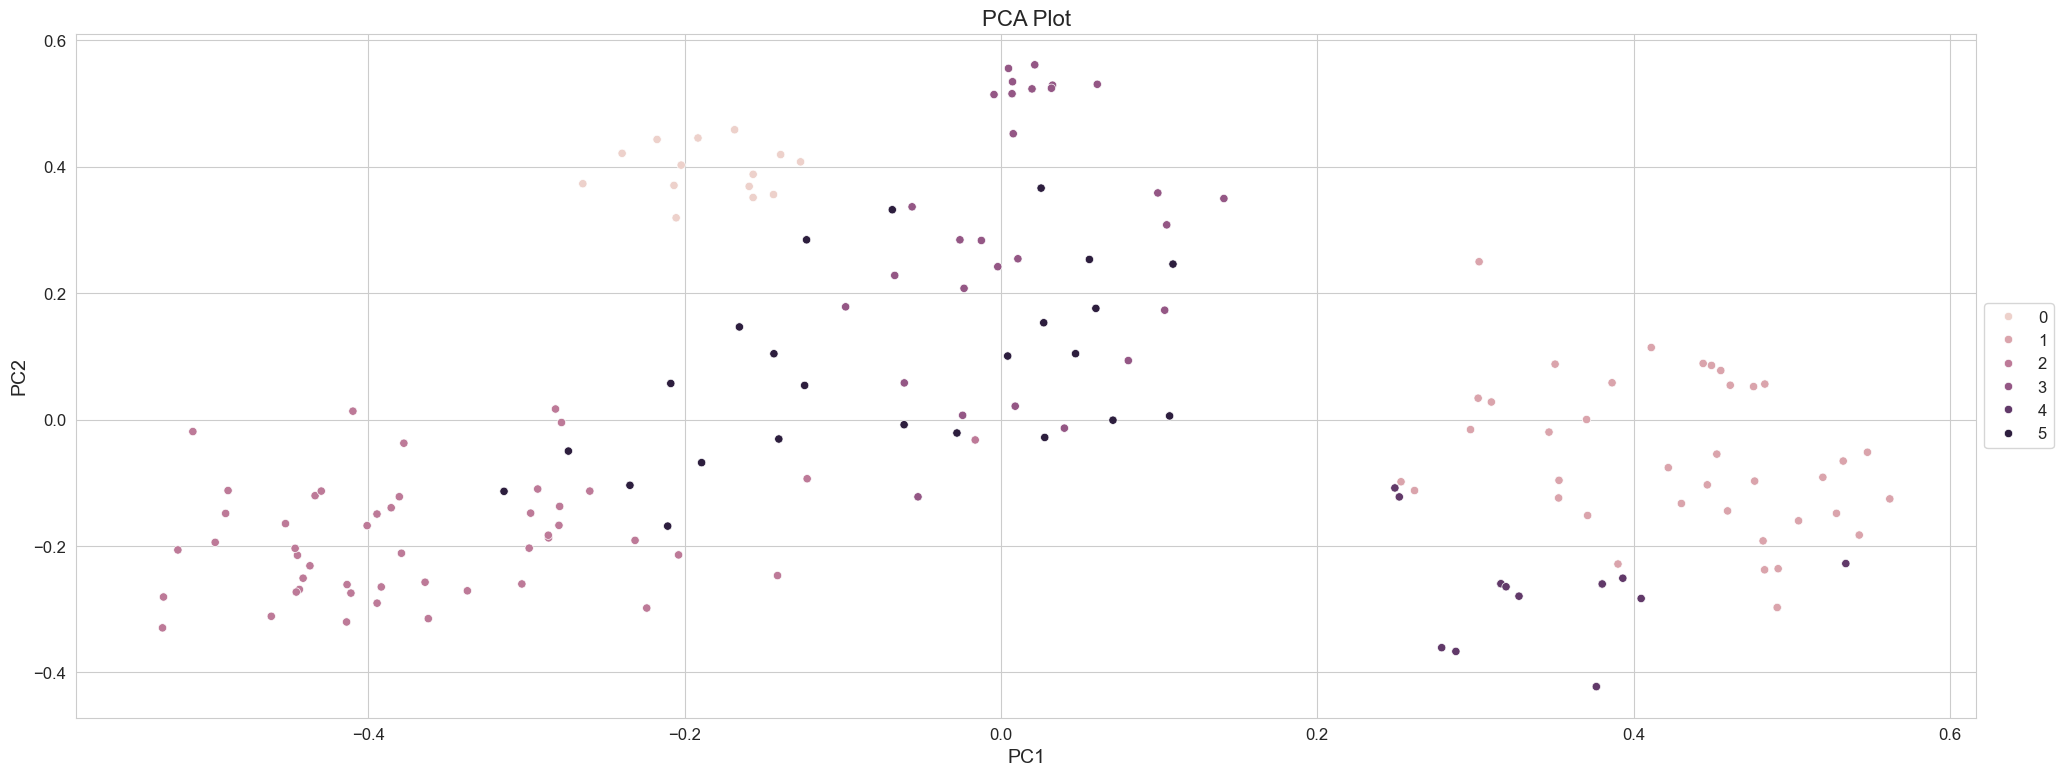

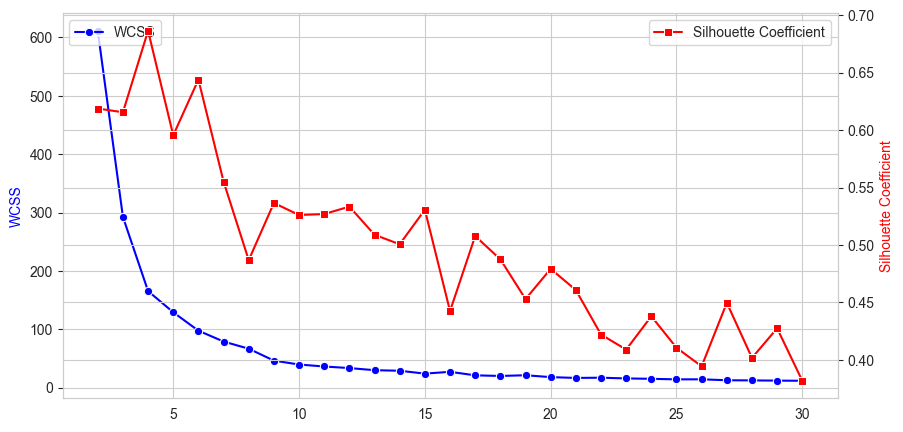

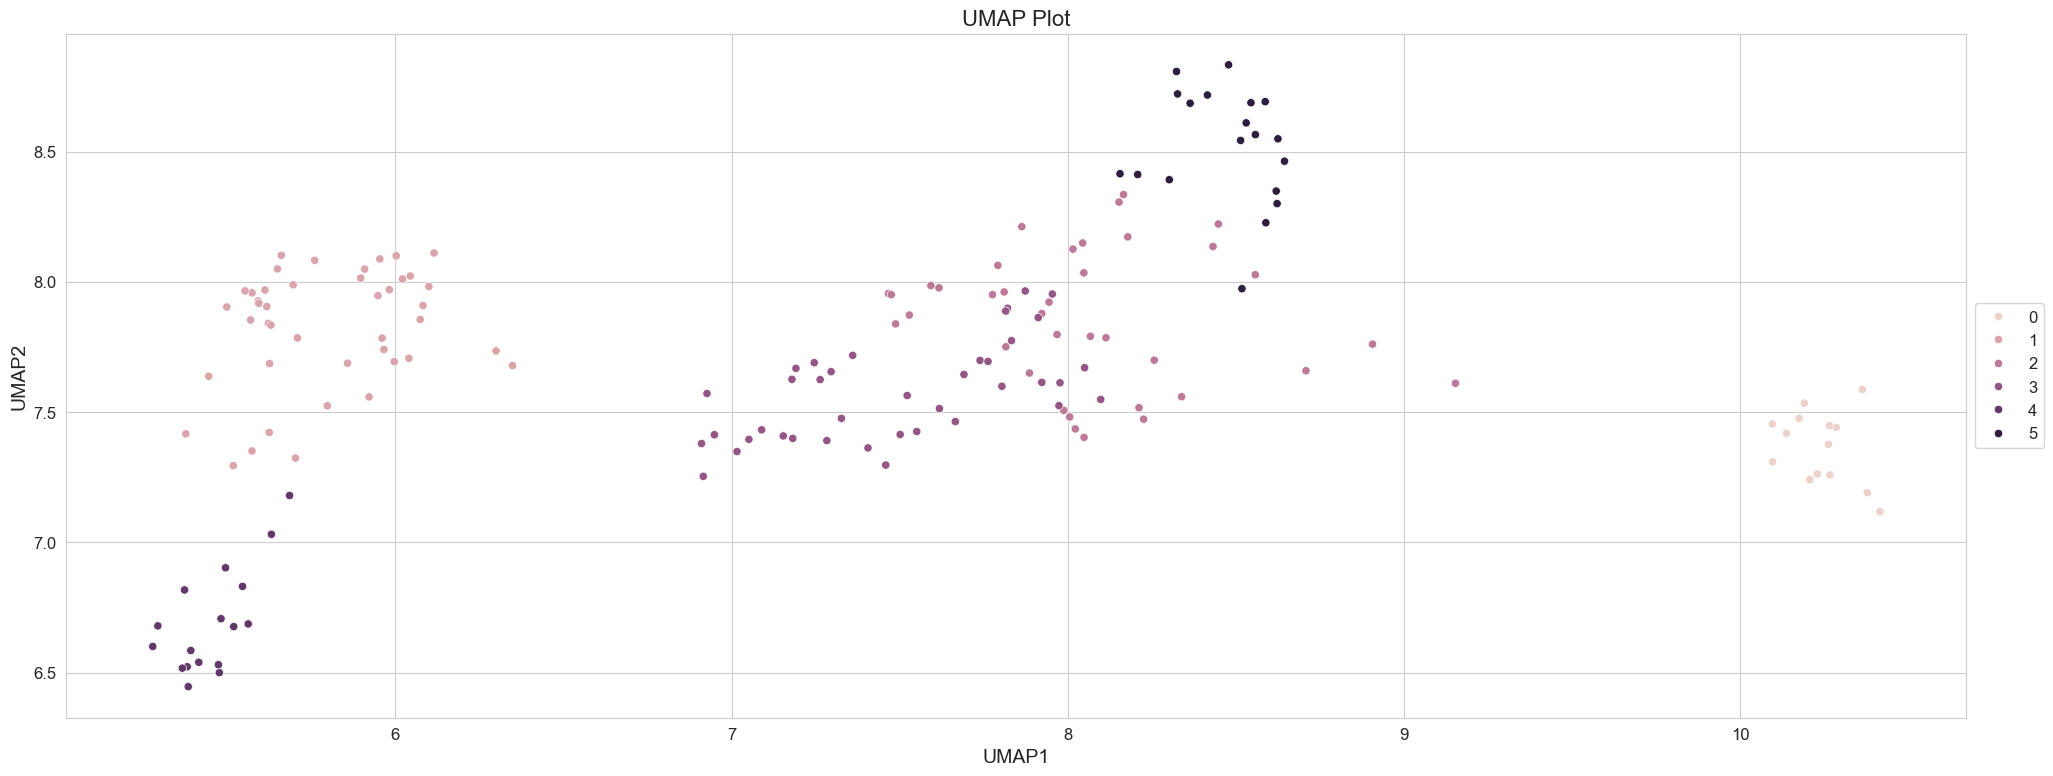

In [14]:
# Case 1
cluster_and_plot(min_clusters=2, max_clusters=30, embedding_prefix='embedding_', df=emb_split_df)
emb_split_df, kmeans_pl = cluster_data(emb_split_df, 'embedding_', n_clusters=19)
plot_pca(emb_split_df, hue='klabels')

# Case 2
cluster_and_plot(min_clusters=2, max_clusters=30, embedding_prefix='PC', df=emb_split_df)
emb_split_df, kmeans_pl = cluster_data(emb_split_df, 'PC', n_clusters=n_components_pca)
plot_pca(emb_split_df, hue='klabels')

# Case 3
cluster_and_plot(min_clusters=2, max_clusters=30, embedding_prefix='UMAP', df=emb_split_df)
emb_split_df, kmeans_pl = cluster_data(emb_split_df, 'UMAP', n_clusters=n_components_pca)
plot_umap(emb_split_df, hue='klabels')

In [121]:
centroid_index = get_centroid_indices(kmeans_pl)
cluster_index_dict = save_faiss_index_by_label(emb_split_df, 'PC')
find_nearest_cluster(centroid_index, cluster_index_dict, pca_pl, query_string='lindt', model=model, emb_split_df=emb_split_df)

tensor([ 0.0243, -0.0444, -0.0171,  0.0121, -0.0205])
[[ 0.3199608  -0.2733656   0.40105647  0.17471421  0.13584499 -0.09875591]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,PC1,PC2,PC3,PC4,...,quantity,price,rating,type,rate,votes,price_str,content,embedding,klabels
109,4.277013,6.470528,8.283848,4.604539,8.093649,4.150843,0.327558,-0.279472,0.384375,0.272109,...,200g,9.95,Rated of 5\n \n \n \n \n \n (7),choco,5,7,Price is 9.95,Lindt Lindor Pistachio.Price is 9.95,"[-0.01559545, 0.0026623432, -0.038036346, -0.0...",5
110,4.024865,6.384196,8.558615,4.512246,8.231173,4.145941,0.316124,-0.259758,0.503358,0.126510,...,100g,7.50,Rated of 5\n \n \n \n \n \n (15),choco,5,15,Price is 7.50,Lindt Mini Pralinés Assorted.Price is 7.50,"[0.009366404, 0.009142333, -0.02745306, -0.003...",5
147,4.027807,6.408490,8.559373,4.551898,8.134164,4.137220,0.316124,-0.259758,0.503358,0.126510,...,180g,12.95,Rated of 5\n \n \n \n \n \n (7),choco,5,7,Price is 12.95,Lindt Mini Pralinés Assorted.Price is 12.95,"[0.009366404, 0.009142333, -0.02745306, -0.003...",5


In [16]:
centroid_index = get_centroid_indices(kmeans_pl)
cluster_index_dict = save_faiss_index_by_label(emb_split_df, 'UMAP')
find_nearest_cluster(centroid_index, cluster_index_dict, umap_pl, query_string='chocolate', model=model, emb_split_df=emb_split_df)

tensor([-0.0196, -0.0028, -0.0188, -0.0114,  0.0760])
[[6.2780037 8.087328  8.933486  5.231836  6.0852504 2.9811907]]


,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,PC1,PC2,PC3,PC4,...,quantity,price,rating,type,rate,votes,price_str,content,embedding,klabels
158,6.115249,8.110748,8.515111,5.572605,5.865180,3.156175,0.261503,-0.112370,-0.468901,-0.253360,...,265g,5.95,Rated of 5\n \n \n \n \n \n (8),choco,5,8,Price is 5.95,Halba Creamy Milk Chocolate Hearts.Price is 5.95,"[-0.054655742, 0.023409812, -0.026498169, -0.0...",1
125,5.954018,8.087847,8.394930,5.289480,6.001232,3.107712,0.301722,0.033753,-0.415371,-0.287532,...,100g,1.80,Rated of 5\n \n \n \n \n \n (40),choco,5,40,Price is 1.80,Halba Chocolate Bar Milk Extra.Price is 1.80,"[-0.04030454, 0.015669418, -0.058209855, -0.01...",1
164,5.960939,7.784137,8.606500,5.551631,6.107761,3.131522,0.346531,-0.019912,-0.461471,-0.036905,...,100g,2.40,Rated of 5\n \n \n \n \n \n (27),choco,5,27,Price is 2.40,Halba Chocolate Bar Dark Pistachios.Price is 2.40,"[-0.052052986, 0.009192401, -0.022590341, -0.0...",1


In [319]:
model.model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [325]:
#emb_split_df
#umap_pl = 
import joblib
umap_pl = joblib.load(path.umap_joblib)

In [326]:
data = {
'title': 'choco',
'type': 'choco',
'quantity': '50',
'price': 50
}

# Create the DataFrame
df = pd.DataFrame(data, index=[0])
df.loc[:,'embedding'] = df['title'].apply(lambda x: model.model.encode(str(x)))
emb_df = df['embedding'].apply(pd.Series).add_prefix('embedding_')
df = pd.concat([emb_df, df], axis=1)

embedding_prefix = 'embedding_'
embedding_columns = [col for col in df.columns if col.startswith(embedding_prefix)]

umap_transformed = umap_pl.transform(df.loc[:, embedding_columns])

In [328]:
len(umap_transformed[0])

5

In [86]:
title = 'Dettol Sanitizer Hand Soap'
typ = 'clean'
quantity = '20ml'
price = 10.0

update_categlogue(title,typ,quantity,price,model,emb_split_df,umap_pl,pca_pl,n_components,kmeans_pl,cluster_index_dict)

def update_categlogue(title,typ,quantity,price,model,emb_split_df,umap_pl,pca_pl,n_components,kmeans_pl,cluster_index_dict):
    
    data = {
    'title': title,
    'type': typ,
    'quantity': quantity,
    'price': price
    }
    
    # Create the DataFrame
    df = pd.DataFrame(data, index=[0])
    df.loc[:,'embedding'] = df['title'].apply(lambda x: model.encode(str(x)))
    emb_df = df['embedding'].apply(pd.Series).add_prefix('embedding_')
    df = pd.concat([emb_df, df], axis=1)
    
    embedding_prefix = 'embedding_'
    embedding_columns = [col for col in df.columns if col.startswith(embedding_prefix)]
    
    umap_transformed = umap_pl.transform(df.loc[:, embedding_columns])
    for i in range(1, n_components + 1):
        df[f'UMAP{i}'] = umap_transformed[:, i - 1]
    pca_transformed = pca_pl.transform(df.loc[:, embedding_columns])
    for i in range(1, n_components + 1):
        df[f'PC{i}'] = pca_transformed[:, i - 1]

    kmeans_embedding_prefix = 'UMAP'
    embedding_columns = [col for col in df.columns if col.startswith(kmeans_embedding_prefix)]
    cluster_labels = kmeans_pl.predict(df.loc[:, embedding_columns])
    df['klabels'] = cluster_labels
    
    embeddings = df[[col for col in df.columns if col.startswith(kmeans_embedding_prefix)]].values.astype('float32')
    #print(embeddings)
    #print(df)
    #print(cluster_labels)
    #print(cluster_index_dict[cluster_labels[0]])
    for key, value in cluster_index_dict.items():
        print(f"Key: {key}, Value: {value.ntotal}")
    cluster_index_dict[cluster_labels[0]].add(embeddings)
    for key, value in cluster_index_dict.items():
        print(f"Key: {key}, Value: {value.ntotal}")
    os.remove('cluster_index_dic.pkl')    
    with open('cluster_index_dic.pkl', 'wb') as file:
        pickle.dump(cluster_index_dict, file)

    df = pd.concat([df, emb_split_df], axis=0)
    df.reset_index(inplace=True, drop=True)
    #print(df[:10][['title','klabels']])
    os.remove('emb_split_df.pkl')
    save_df(df, 'emb_split_df.pkl', 'pickle')
    

update_categlogue(title,typ,quantity,price,model,emb_split_df,umap_pl,pca_pl,n_components,kmeans_pl,cluster_index_dict)

[[8.38838   9.113438  5.0172095 2.0461566 9.600168  4.827789 ]]
   embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
0     0.022458    -0.043791    -0.003549    -0.020186      0.00786   

   embedding_5  embedding_6  embedding_7  embedding_8  embedding_9  ...  \
0      0.07967    -0.032016      0.03174    -0.069736     0.003514  ...   

      UMAP4     UMAP5     UMAP6       PC1       PC2       PC3      PC4  \
0  2.046157  9.600168  4.827789 -0.438318 -0.319534 -0.031489  0.09367   

        PC5       PC6  klabels  
0 -0.046627  0.100916        5  

[1 rows x 786 columns]
[5]
<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x000001F1BA555860> >
Key: 2, Value: 37
Key: 5, Value: 19
Key: 1, Value: 43
Key: 3, Value: 39
Key: 0, Value: 14
Key: 4, Value: 17
Key: 2, Value: 37
Key: 5, Value: 20
Key: 1, Value: 43
Key: 3, Value: 39
Key: 0, Value: 14
Key: 4, Value: 17
                                          title  klabels
0              

In [54]:
df = pd.read_pickle('emb_split_d.pkl')

In [83]:
cluster_index_dic = pickle.load(open('cluster_index_dic.pkl', 'rb'))
cluster_index_dict = pickle.load(open('cluster_index_dict.pkl', 'rb'))


In [84]:
# Iterate over the keys and values of the dictionary and print them side by side
for key, value in cluster_index_dic.items():
    print(f"Key: {key}, Value: {value.ntotal}")

Key: 2, Value: 37
Key: 5, Value: 20
Key: 1, Value: 43
Key: 3, Value: 39
Key: 0, Value: 14
Key: 4, Value: 17


In [85]:
# Iterate over the keys and values of the dictionary and print them side by side
for key, value in cluster_index_dict.items():
    print(f"Key: {key}, Value: {value.ntotal}")

Key: 2, Value: 37
Key: 5, Value: 19
Key: 1, Value: 43
Key: 3, Value: 39
Key: 0, Value: 14
Key: 4, Value: 17


In [ ]:
#Done

In [35]:
# Load saved PCA pipeline
pca_pl = load('pca_pipeline.joblib')

# Load saved UMAP pipeline
umap_pl = load('umap_pipeline.joblib')

# Load saved KMeans pipeline
kmeans_pl = load('kmeans_pipeline.joblib')

cluster_index_dict = pickle.load(open('cluster_index_dict.pkl', 'rb'))

model = SentenceTransformer("all-distilroberta-v1")

n_components=6

emb_split_df = pd.read_pickle('emb_split_df.pkl')

In [17]:
from joblib import dump, load

# Save trained PCA pipeline
dump(pca_pl, 'pca_pipeline.joblib')

# Save trained UMAP pipeline
dump(umap_pl, 'umap_pipeline.joblib')

# Save trained KMeans pipeline
dump(kmeans_pl, 'kmeans_pipeline.joblib')

# Load saved PCA pipeline
loaded_pca_pipeline = load('pca_pipeline.joblib')

# Load saved UMAP pipeline
loaded_umap_pipeline = load('umap_pipeline.joblib')

# Load saved KMeans pipeline
loaded_kmeans_pipeline = load('kmeans_pipeline.joblib')

['pca_pipeline.joblib']

['umap_pipeline.joblib']

['kmeans_pipeline.joblib']

In [84]:
umap_pl['clf']

UMAP(n_components=4, random_state=42)

In [85]:
import joblib

joblib.dump(umap_pl, 'umap.joblib')

['umap.joblib']

In [19]:
# Save the dictionary to a file using pickle
with open('cluster_index_dict.pkl', 'wb') as file:
    pickle.dump(cluster_index_dict, file)

In [18]:
from faiss import write_index, read_index
write_index(centroid_index, "centroid_index")

In [98]:
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca_pl['clf'], f)

In [80]:
with open('umap.pkl', 'wb') as f:
    pickle.dump(umap_pl['clf'], f)

In [20]:
save_df(emb_split_df, 'emb_split_df.pkl', 'pickle')

'emb_split_df.pkl'

In [27]:
emb_split_df

In [34]:
from joblib import dump, load

model = SentenceTransformer("all-distilroberta-v1")
emb_split_df = pd.read_pickle('emb_split_df.pkl')
centroid_index = read_index("centroid_index")
cluster_index_dict = pickle.load(open('cluster_index_dict.pkl', 'rb'))
umap_pl = load('umap_pipeline.joblib')

find_nearest_cluster(centroid_index, cluster_index_dict, umap_pl, query_string='axe', model=model, emb_split_df=emb_split_df)

,UMAP1,UMAP2,UMAP3,UMAP4,PC1,PC2,PC3,PC4,embedding_0,embedding_1,...,quantity,price,rating,type,rate,votes,price_str,content,embedding,klabels
39,7.853416,11.765518,7.391005,7.596006,0.047138,0.104159,-0.114845,0.260654,0.004839,0.005341,...,50ml,5.9,Rated of 5\n \n \n \n \n \n (40),clean,5,40,Price is 5.90,Borotalco Deo Original Roll On.Price is 5.90,"[0.0048391204, 0.005341119, -0.0145011395, 0.0...",2
53,7.963267,12.006897,7.432772,7.774323,-0.208824,0.057049,-0.064937,0.171184,-0.026285,-0.029308,...,50ml,2.4,Rated of 5\n \n \n \n \n \n (6),clean,5,6,Price is 2.40,Rexona Cotton Roll-on Dry.Price is 2.40,"[-0.02628483, -0.029307945, 0.0012037986, 0.02...",2
16,7.804289,11.894005,7.466635,7.691928,0.027009,0.153094,-0.133686,0.176362,0.018754,0.007538,...,50ml,2.4,Rated of 5\n \n \n \n \n \n (17),clean,5,17,Price is 2.40,Rexona cobalt blue deo roll-on.Price is 2.40,"[0.0187539, 0.0075375508, -0.03342128, 0.04222...",2


In [32]:
cluster_index_dict[0]
read_index("centroid_index")


<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x79c7922d1200> >

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x79c791036670> >

In [18]:
from faiss import write_index, read_index
write_index(centroid_index, "centroid_index")
#index = read_index("large.index")

In [83]:
def find_nearest_cluster(centroid_index, cluster_index_dict, dim_reduction_pipeline, query_string, model, emb_split_df):
    # Encode the query string using the model

    query = model.encode(query_string, convert_to_tensor=True)
    print(query[:5])
    # Convert query point to numpy array and float32 (required by FAISS)
    query_point = query.numpy().astype(np.float32)
    print(query_point[:5])

    # Transform query point using PCA pipeline
    #dim_reduction_pipeline.fit(query_point.reshape(1, -1))
    with open('umap.pkl','rb') as f:
      loaded_model = pickle.load(f)
    query_point_pca = loaded_model.transform(query_point.reshape(1, -1))
    #query_point_pca = dim_reduction_pipeline.transform(query_point.reshape(1, -1))
    print(query_point_pca)
    #query_point_pca = dim_reduction_pipeline.transform(query_point.reshape(1, -1))

    # Perform nearest neighbor search
    _, nearest_centroid_index = centroid_index.search(query_point_pca, k=1)
    print(nearest_centroid_index)
    _, nearest_cluster_index = cluster_index_dict[nearest_centroid_index[0][0]].search(query_point_pca, k=3)

    # Get the indices of recommended rows
    recommended_indices = nearest_cluster_index[0].tolist()

    # Retrieve recommended rows from the DataFrame
    recommended_rows = emb_split_df.loc[emb_split_df['klabels'] == nearest_centroid_index[0][0]].iloc[recommended_indices]

    return recommended_rows

n_components=4
umap_pl = Pipeline(steps=[
        ('clf', UMAP(n_components=n_components,random_state=42))
    ])
emb_split_df = pd.read_pickle('emb_split_df.pkl')
centroid_index = faiss.read_index('centroid_index')
cluster_index_dict = pickle.load(open('cluster_index_dict.pkl', 'rb'))
model = SentenceTransformer("all-distilroberta-v1")

search_query = 'soap'
recommended_items = find_nearest_cluster(centroid_index, cluster_index_dict, umap_pl, query_string=search_query, model=model, emb_split_df=emb_split_df)
print(recommended_items['content'])



tensor([ 0.0257, -0.0028, -0.0307, -0.1070,  0.0623])
[ 0.02570247 -0.00278668 -0.03074323 -0.10701386  0.06229625]
[[11.668497   4.8752327  7.100122   7.0291486]]
[[2]]
5     well Almond & honey cream soap Refill.Price is...
33    well Floral Blossom micellar soap Refill.Price...
27    Naturaline liquid soap Sea salt & lotus blosso...
Name: content, dtype: object


In [69]:
centroid_index

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7ed302417f60> >

In [ ]:
#def remove_null_title(df):
#  df = df.dropna(subset=['title'])
#  return df

#drink = drink.dropna(subset=['title'])
#get_column_info(drink)

,Column Name,Null Values,Total Values,Column Type
0,web-scraper-order,0,49,object
1,web-scraper-start-url,0,49,object
2,title,0,49,object
3,rating,0,49,object
4,quantity,0,49,object
5,price,0,49,object


<ipython-input-77-b96abeac298d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'type'] = name
<ipython-input-77-b96abeac298d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'rate'] = df['rating'].str.extract(r'Rated  of (\d+)')
<ipython-input-77-b96abeac298d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,web-scraper-order,web-scraper-start-url,title,quantity,price,rating,type,rate,votes,price_str,content,embedding
0,1708456208-1,https://www.coop.ch/en/cosmetics-health/body-c...,Dove Deo Spray Original,150ml,4.95,Rated of 5\n \n \n \n \n \n (6),clean,5,6,Price is 4.95,Dove Deo Spray Original.Price is 4.95,"[0.011071012, 0.010229009, -0.0027577712, -0.0..."
1,1708456208-2,https://www.coop.ch/en/cosmetics-health/body-c...,Dettol Rejuvenating Liquid Hand Soap,250ml,4.20,Rated of 5\n \n \n \n \n \n (8),clean,5,8,Price is 4.20,Dettol Rejuvenating Liquid Hand Soap.Price is ...,"[0.017535742, -0.028558224, -0.0011432321, -0...."
2,1708456208-3,https://www.coop.ch/en/cosmetics-health/body-c...,Dove Beauty Cream Wash Liquid Soap Refill,500ml,4.90,Rated of 5\n \n \n \n \n \n (29),clean,5,29,Price is 4.90,Dove Beauty Cream Wash Liquid Soap Refill.Pric...,"[0.051863633, -0.036048867, 0.007431103, -0.12..."
3,1708456208-4,https://www.coop.ch/en/cosmetics-health/body-c...,Axe Duschgel Black,250ml,3.50,Rated of 5\n \n \n \n \n \n (11),clean,5,11,Price is 3.50,Axe Duschgel Black.Price is 3.50,"[0.0037396802, -0.03454781, -0.022952149, -0.0..."
4,1708456208-5,https://www.coop.ch/en/cosmetics-health/body-c...,Prix Garantie Liquid Soap Refill,1000ml,1.80,Rated of 5\n \n \n \n \n \n (46),clean,5,46,Price is 1.80,Prix Garantie Liquid Soap Refill.Price is 1.80,"[0.020342184, -0.03778631, -0.035024557, -0.08..."
...,...,...,...,...,...,...,...,...,...,...,...,...
164,1708455255-56,https://www.coop.ch/en/food/sweets-snacks/choc...,Halba Chocolate Bar Dark Pistachios,100g,2.40,Rated of 5\n \n \n \n \n \n (27),choco,5,27,Price is 2.40,Halba Chocolate Bar Dark Pistachios.Price is 2.40,"[-0.05205298, 0.009192424, -0.02259033, -0.028..."
165,1708455255-57,https://www.coop.ch/en/food/sweets-snacks/choc...,Lindt Excellence Dark Chilli Bar,100g,3.20,Rated of 5\n \n \n \n \n \n (33),choco,5,33,Price is 3.20,Lindt Excellence Dark Chilli Bar.Price is 3.20,"[-0.044503976, -0.0028433749, -0.0252149, -0.0..."
166,1708455255-58,https://www.coop.ch/en/food/sweets-snacks/choc...,Lindt Sensation Fruit Dark Rasperry & Cranberry,150g,4.95,Rated of 5\n \n \n \n \n \n (23),choco,5,23,Price is 4.95,Lindt Sensation Fruit Dark Rasperry & Cranberr...,"[-0.022079555, 0.0013135972, 0.009629991, 0.05..."
167,1708455255-59,https://www.coop.ch/en/food/sweets-snacks/choc...,Lindt Crémant Dark 49% Bar,100g,2.50,Rated of 5\n \n \n \n \n \n (6),choco,5,6,Price is 2.50,Lindt Crémant Dark 49% Bar.Price is 2.50,"[-0.03908866, -0.020393562, -0.027074669, -0.0..."


,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,title,quantity,price,rating,type,rate,votes,price_str,content,embedding
0,0.011071,0.010229,-0.002758,-0.040556,0.000272,0.060706,0.005447,0.040574,0.027655,-0.027205,...,Dove Deo Spray Original,150ml,4.95,Rated of 5\n \n \n \n \n \n (6),clean,5,6,Price is 4.95,Dove Deo Spray Original.Price is 4.95,"[0.011071012, 0.010229009, -0.0027577712, -0.0..."
1,0.017536,-0.028558,-0.001143,-0.038499,0.015833,0.063635,-0.020050,0.014970,-0.065582,-0.000016,...,Dettol Rejuvenating Liquid Hand Soap,250ml,4.20,Rated of 5\n \n \n \n \n \n (8),clean,5,8,Price is 4.20,Dettol Rejuvenating Liquid Hand Soap.Price is ...,"[0.017535742, -0.028558224, -0.0011432321, -0...."
2,0.051864,-0.036049,0.007431,-0.120294,0.024002,0.010234,-0.004921,0.060287,-0.036749,0.019115,...,Dove Beauty Cream Wash Liquid Soap Refill,500ml,4.90,Rated of 5\n \n \n \n \n \n (29),clean,5,29,Price is 4.90,Dove Beauty Cream Wash Liquid Soap Refill.Pric...,"[0.051863633, -0.036048867, 0.007431103, -0.12..."
3,0.003740,-0.034548,-0.022952,-0.021453,0.007299,0.044152,0.016801,0.044387,-0.019962,-0.023334,...,Axe Duschgel Black,250ml,3.50,Rated of 5\n \n \n \n \n \n (11),clean,5,11,Price is 3.50,Axe Duschgel Black.Price is 3.50,"[0.0037396802, -0.03454781, -0.022952149, -0.0..."
4,0.020342,-0.037786,-0.035025,-0.084351,0.009353,0.019974,-0.006787,0.021542,0.000747,-0.033983,...,Prix Garantie Liquid Soap Refill,1000ml,1.80,Rated of 5\n \n \n \n \n \n (46),clean,5,46,Price is 1.80,Prix Garantie Liquid Soap Refill.Price is 1.80,"[0.020342184, -0.03778631, -0.035024557, -0.08..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,-0.052053,0.009192,-0.022590,-0.028895,0.034786,0.076101,0.012002,0.061591,0.019202,0.012680,...,Halba Chocolate Bar Dark Pistachios,100g,2.40,Rated of 5\n \n \n \n \n \n (27),choco,5,27,Price is 2.40,Halba Chocolate Bar Dark Pistachios.Price is 2.40,"[-0.05205298, 0.009192424, -0.02259033, -0.028..."
165,-0.044504,-0.002843,-0.025215,-0.043849,0.002408,0.053890,0.009167,0.009117,0.039885,-0.006036,...,Lindt Excellence Dark Chilli Bar,100g,3.20,Rated of 5\n \n \n \n \n \n (33),choco,5,33,Price is 3.20,Lindt Excellence Dark Chilli Bar.Price is 3.20,"[-0.044503976, -0.0028433749, -0.0252149, -0.0..."
166,-0.022080,0.001314,0.009630,0.057783,-0.001260,0.087049,0.011064,0.074669,0.006945,0.029708,...,Lindt Sensation Fruit Dark Rasperry & Cranberry,150g,4.95,Rated of 5\n \n \n \n \n \n (23),choco,5,23,Price is 4.95,Lindt Sensation Fruit Dark Rasperry & Cranberr...,"[-0.022079555, 0.0013135972, 0.009629991, 0.05..."
167,-0.039089,-0.020394,-0.027075,-0.013057,0.041468,0.080469,0.025939,0.002946,-0.018352,-0.025293,...,Lindt Crémant Dark 49% Bar,100g,2.50,Rated of 5\n \n \n \n \n \n (6),choco,5,6,Price is 2.50,Lindt Crémant Dark 49% Bar.Price is 2.50,"[-0.03908866, -0.020393562, -0.027074669, -0.0..."


In [ ]:


embedding_columns = [col for col in emb_split_df.columns if col.startswith('embedding_')]


wcss = []
sc   = []
for n in range(2,30):
  kmeans = KMeans(n_clusters=n,max_iter=50)
  kmeans.fit(emb_split_df.loc[:,embedding_columns])
  wcss.append(kmeans.inertia_)
  cluster_labels=kmeans.labels_
   # silhouette score
  silhouette_avg = silhouette_score(emb_split_df.loc[:,embedding_columns], cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(n, silhouette_avg))
  sc.append(silhouette_avg)

wcss
sc

# Create the first line plot with its own y-axis (left y-axis)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
ax1 = sns.lineplot( wcss, label='WCSS', marker='o', color='b')
ax1.set_ylabel('WCSS', color='b')

# Create the second line plot with its own y-axis (right y-axis)
ax2 = ax1.twinx()
sns.lineplot(sc, label='Silhouette Coefficient', marker='s', color='r')
ax2.set_ylabel('Silhouette Coefficient', color='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=60)
Elbow_M.fit(emb_split_df.loc[:,embedding_columns])
Elbow_M.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=2)

For n_clusters=2, the silhouette score is 0.10902009904384613


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

For n_clusters=3, the silhouette score is 0.12006783485412598


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

For n_clusters=4, the silhouette score is 0.1164827048778534


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

For n_clusters=5, the silhouette score is 0.11384551227092743


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=6)

For n_clusters=6, the silhouette score is 0.12266681343317032


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=7)

For n_clusters=7, the silhouette score is 0.10309484601020813


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50)

For n_clusters=8, the silhouette score is 0.12380361557006836


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=9)

For n_clusters=9, the silhouette score is 0.11920313537120819


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=10)

For n_clusters=10, the silhouette score is 0.12385565787553787


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=11)

For n_clusters=11, the silhouette score is 0.13044355809688568


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=12)

For n_clusters=12, the silhouette score is 0.13756030797958374


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=13)

For n_clusters=13, the silhouette score is 0.13912515342235565


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=14)

For n_clusters=14, the silhouette score is 0.13288737833499908


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=15)

For n_clusters=15, the silhouette score is 0.13288584351539612


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=16)

For n_clusters=16, the silhouette score is 0.14496052265167236


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=17)

For n_clusters=17, the silhouette score is 0.15232788026332855


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=18)

For n_clusters=18, the silhouette score is 0.13276447355747223


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=19)

For n_clusters=19, the silhouette score is 0.1467914879322052


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=20)

For n_clusters=20, the silhouette score is 0.14927248656749725


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=21)

For n_clusters=21, the silhouette score is 0.15411332249641418


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=22)

For n_clusters=22, the silhouette score is 0.14834220707416534


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=23)

For n_clusters=23, the silhouette score is 0.1627768576145172


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=24)

For n_clusters=24, the silhouette score is 0.15542037785053253


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=25)

For n_clusters=25, the silhouette score is 0.15008993446826935


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=26)

For n_clusters=26, the silhouette score is 0.159005805850029


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=27)

For n_clusters=27, the silhouette score is 0.1590384691953659


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=28)

For n_clusters=28, the silhouette score is 0.16504241526126862


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=29)

For n_clusters=29, the silhouette score is 0.13276158273220062


[110.2370834350586,
 101.02732849121094,
 95.99153137207031,
 91.59373474121094,
 88.13702392578125,
 85.85343170166016,
 82.37509155273438,
 79.92842102050781,
 78.57229614257812,
 74.87715911865234,
 73.46331787109375,
 71.37659454345703,
 70.10077667236328,
 68.91948699951172,
 67.69876098632812,
 65.2899169921875,
 65.03070831298828,
 63.71011734008789,
 62.300899505615234,
 60.92522048950195,
 59.43603515625,
 58.59463882446289,
 57.871421813964844,
 56.95144271850586,
 55.0733642578125,
 54.239261627197266,
 53.20591735839844,
 52.97273635864258]

[0.1090201,
 0.120067835,
 0.116482705,
 0.11384551,
 0.12266681,
 0.103094846,
 0.123803616,
 0.119203135,
 0.12385566,
 0.13044356,
 0.13756031,
 0.13912515,
 0.13288738,
 0.13288584,
 0.14496052,
 0.15232788,
 0.13276447,
 0.14679149,
 0.14927249,
 0.15411332,
 0.1483422,
 0.16277686,
 0.15542038,
 0.15008993,
 0.1590058,
 0.15903847,
 0.16504242,
 0.13276158]

<Figure size 1000x500 with 0 Axes>

Text(0, 0.5, 'WCSS')

<Axes: >

Text(0, 0.5, 'Silhouette Coefficient')

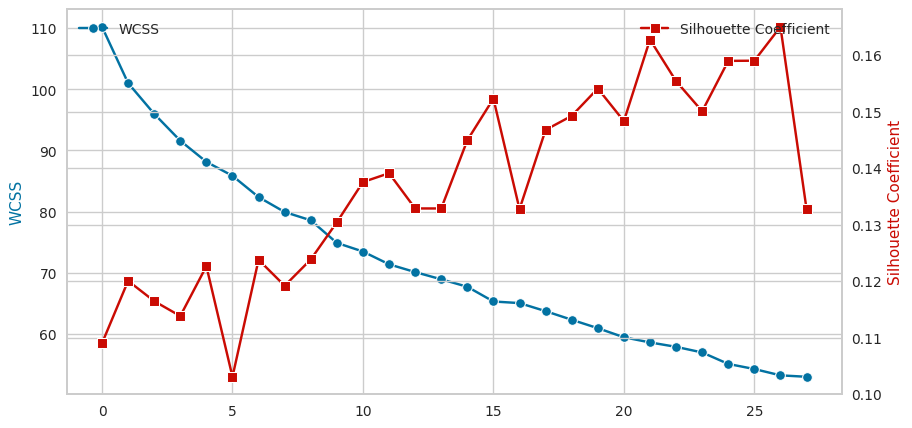

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=60), k=60)

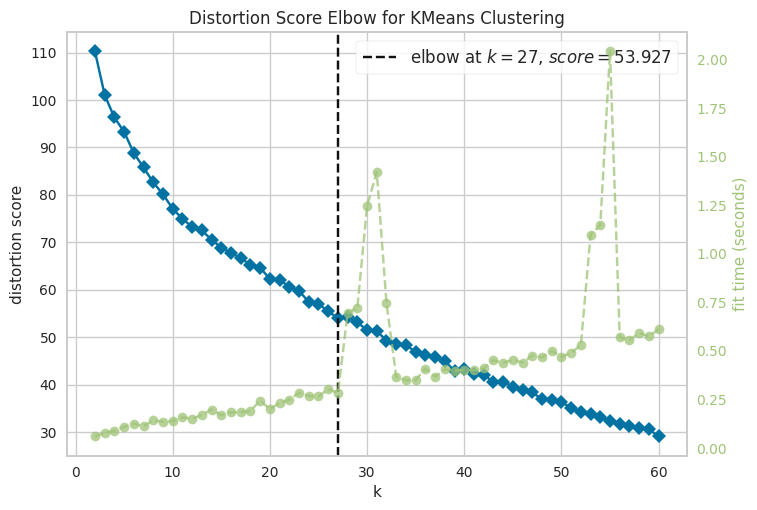

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
pl = Pipeline(
    steps=([
    ('clf',PCA(2))
    ])
)
pca_df = pd.DataFrame(pl.fit_transform(emb_split_df.loc[:,embedding_columns]),
                      columns=['PC1','PC2'])
emb_split_df = pd.concat([pca_df,emb_split_df], axis=1)

emb_split_df.head(2)

fig, axes = plt.subplots(1,1,figsize=(4,4))
plt.subplots_adjust(right=2.5, top=1.25)

#pca_df['type'] = emb_split_df.type
#scaled_df['kmeanslabels'] = plkmeans[0].labels_
#rf_mfr['kmeanslabels'] = plkmeans[0].labels_
sns.scatterplot(x='PC1',y='PC2',data=emb_split_df,hue='type',ax=axes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('kmeans', KMeans(n_clusters=19))])

array([11,  6, 10, 13, 10, 10,  6, 18, 18, 18, 18, 17, 18, 10, 18,  2, 11,
        2, 13,  2,  5, 13,  2,  9,  2,  6, 10, 10,  2,  2, 10, 10, 18, 10,
       11, 18, 10,  6,  7, 11, 18,  2,  4,  2,  2, 18, 10, 11,  9,  6, 10,
       18,  9, 11, 10,  2,  2, 10, 18, 13,  4,  0,  0,  4,  0,  0, 11,  4,
        4,  0,  5,  0,  5,  5,  4,  4,  5,  5, 15,  4,  5,  4, 15, 11,  5,
        7,  4,  5,  5, 15,  7,  4,  4, 15,  0,  5,  0,  4, 15,  5, 15,  4,
       15, 17, 13,  0,  0,  0,  4,  8,  8, 12,  1, 17,  3,  3, 14,  3,  1,
       17,  3,  3,  3, 16,  3, 14, 14,  1,  8, 17,  3,  3, 16,  3,  3, 14,
       16, 17, 14, 17, 17, 14, 14,  8, 14, 16,  3,  8, 16,  1,  7, 12,  8,
        3,  1,  8,  3, 14, 14, 16,  7,  7,  1, 14, 14,  1,  3, 17, 16],
      dtype=int32)

<Axes: xlabel='PC1', ylabel='PC2'>

Text(0.5, 1.0, 'Clusters in PC1-PC2 space')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

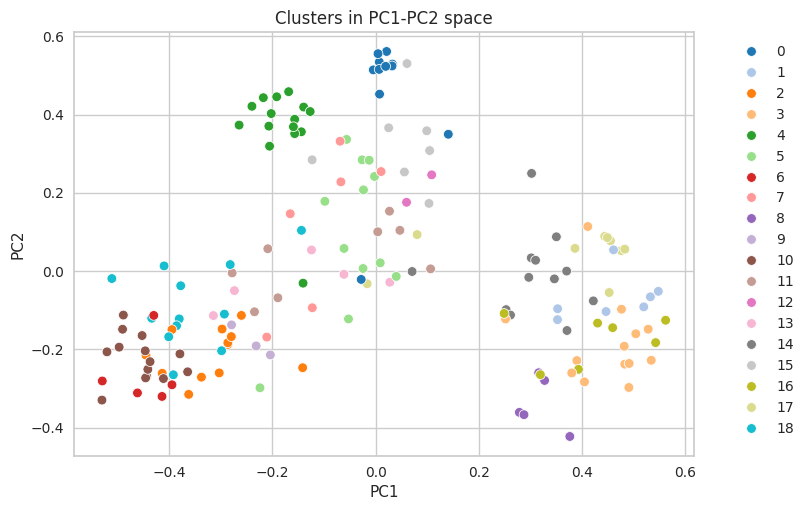

In [ ]:
from sklearn.pipeline import Pipeline
plkmeans = Pipeline(
    steps=([
    ('kmeans',KMeans(n_clusters=19, init='k-means++', ))
    ])
    )

plkmeans.fit(emb_split_df.loc[:,embedding_columns])
emb_split_df['klabels'] = plkmeans.predict(emb_split_df.loc[:,embedding_columns])

plkmeans[0].labels_

# Plotting using Seaborn
sns.scatterplot(data=emb_split_df, x='PC1', y='PC2', hue='klabels', palette='tab20')
plt.title('Clusters in PC1-PC2 space')
plt.xlabel('PC1')
plt.ylabel('PC2')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
np.unique(plkmeans[0].labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int32)

In [ ]:
# Get the labels assigned to each data point
labels = plkmeans.named_steps['kmeans'].labels_

# Get the centroids of each cluster
centroids = plkmeans.named_steps['kmeans'].cluster_centers_

# Create a DataFrame with labels and corresponding centroids
centroids_df = pd.DataFrame({
    #'Label': np.arange(0,19),
    'Centroid': centroids.tolist()  # Convert centroids to list for DataFrame creation
})

centroids_df

,Centroid
0,"[-0.03445183113217354, 0.27690285444259644]"
1,"[-0.3484113812446594, -0.17244035005569458]"
2,"[0.4071349501609802, -0.13127382099628448]"


In [ ]:
np.shape(centroids)

(19, 768)

In [ ]:
a = model.encode("Lindt Lindor Pistachio", convert_to_tensor=True)

In [ ]:
for i in centroids_df['Centroid']:
  util.dot_score(a,i)
  #np.array_equal(i,nearest_centroid)

tensor([[0.5981]])

tensor([[0.1414]])

tensor([[0.1332]])

tensor([[0.4316]])

tensor([[0.0355]])

tensor([[0.1608]])

tensor([[0.0534]])

tensor([[0.3476]])

tensor([[0.1232]])

tensor([[0.0899]])

tensor([[0.0268]])

tensor([[0.1349]])

tensor([[0.2451]])

tensor([[0.1446]])

tensor([[0.0582]])

tensor([[0.1307]])

tensor([[0.0939]])

tensor([[0.1149]])

tensor([[0.0647]])

In [ ]:
centroids_df.index[0]

0

In [ ]:
nearest_centroid
centroids_df[centroids_df['Centroid'].apply(lambda x: np.array_equal(x, nearest_centroid))]

array([ 0.40713495, -0.13127382], dtype=float32)

,Centroid


In [ ]:
import numpy as np
import faiss
from sklearn.cluster import KMeans

# Get the centroids of each cluster
centroids = kmeans_pl.named_steps['kmeans'].cluster_centers_

# Convert centroids to float32 (required by FAISS)
centroids = centroids.astype(np.float32)

# Initialize FAISS index
index = faiss.IndexFlatL2(2)

# Add centroids to FAISS index
index.add(centroids)

query = model.encode("Lindt Lindor Pistachio", convert_to_tensor=True)

# Given a query point query_point, find the nearest centroid
query_point = query.numpy()  # Example query point
query_point = query_point.astype(np.float32)  # Convert to float32 (required by FAISS)

query_point = pca_pl.named_steps['clf'].transform(query_point.reshape(1, -1))

# Perform nearest neighbor search
_, nearest_centroid_index = index.search(query_point, k=1)

# Retrieve the nearest centroid
nearest_centroid = centroids[nearest_centroid_index[0][0]]

# Create a DataFrame with labels and corresponding centroids
centroids_df = pd.DataFrame({
    'Centroid': centroids.tolist()  # Convert centroids to list for DataFrame creation
})

# Find the index of the row where 'Centroid' column matches nearest_centroid
matching_index = centroids_df[centroids_df['Centroid'].apply(lambda x: np.array_equal(x, nearest_centroid))].index[0]

emb_split_df.loc[emb_split_df['klabels']==matching_index]

[[ 0.3275576 -0.2794708]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,PC1,PC2,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,quantity,price,rating,type,rate,votes,price_str,content,embedding,klabels
109,0.327558,-0.279471,-0.015595,0.002662,-0.038036,-0.027692,-0.021001,0.118097,0.029181,0.099825,...,200g,9.95,Rated of 5\n \n \n \n \n \n (7),choco,5,7,Price is 9.95,Lindt Lindor Pistachio.Price is 9.95,"[-0.01559545, 0.0026623432, -0.038036346, -0.0...",2
110,0.316124,-0.259758,0.009366,0.009142,-0.027453,-0.003116,-0.033008,0.033971,0.023416,0.048009,...,100g,7.50,Rated of 5\n \n \n \n \n \n (15),choco,5,15,Price is 7.50,Lindt Mini Pralinés Assorted.Price is 7.50,"[0.009366404, 0.009142333, -0.02745306, -0.003...",2
112,0.352859,-0.096221,-0.027983,-0.030486,-0.018500,-0.024807,0.022367,0.033714,-0.008224,0.022724,...,100g,3.15,Rated of 5\n \n \n \n \n \n (90),choco,5,90,Price is 3.15,Lindt Excellence Dark Sea Salt Bar.Price is 3.15,"[-0.027982898, -0.030485533, -0.01850028, -0.0...",2
113,0.455155,0.077501,-0.045586,0.016990,-0.048910,-0.036597,0.005565,0.108842,0.021961,0.000743,...,100g,3.15,Rated of 5\n \n \n \n \n \n (51),choco,5,51,Price is 3.15,Lindt Excellence Dark 70% Cacao Bar.Price is 3.15,"[-0.045585513, 0.016990434, -0.048909564, -0.0...",2
114,0.482868,-0.237779,-0.045713,-0.001208,-0.047872,-0.030786,0.019278,0.084363,0.045283,0.058804,...,100g,2.45,Rated of 5\n \n \n \n \n \n (62),choco,5,62,Price is 2.45,Lindt Bar Milk.Price is 2.45,"[-0.045713298, -0.0012075223, -0.047871836, -0...",2
115,0.490845,-0.297401,-0.039724,0.013453,-0.010177,-0.018892,0.027714,0.052766,0.025432,0.075067,...,100g,2.45,Rated of 5\n \n \n \n \n \n (41),choco,5,41,Price is 2.45,Lindt Bar Milk Hazelnut.Price is 2.45,"[-0.03972448, 0.013453446, -0.010176914, -0.01...",2
117,0.504350,-0.160211,-0.053067,0.027095,-0.030131,-0.032018,0.040257,0.078916,0.037245,0.045815,...,100g,2.65,Rated of 5\n \n \n \n \n \n (42),choco,5,42,Price is 2.65,Lindt Chocoletti Milk Bar.Price is 2.65,"[-0.05306688, 0.027094519, -0.030130768, -0.03...",2
118,0.519709,-0.091412,-0.033351,-0.026875,-0.019212,-0.027166,-0.030032,0.069162,0.030849,0.019314,...,100g,3.15,Rated of 5\n \n \n \n \n \n (79),choco,5,79,Price is 3.15,Lindt Excellence Dark Orange Bar.Price is 3.15,"[-0.033351414, -0.02687515, -0.019211661, -0.0...",2
119,0.475900,0.052104,-0.044606,0.018420,-0.047773,-0.031691,0.006373,0.113482,0.019215,-0.000213,...,100g,3.20,Rated of 5\n \n \n \n \n \n (36),choco,5,36,Price is 3.20,Lindt Excellence Dark 90% Cacao Bar.Price is 3.20,"[-0.04460601, 0.018419567, -0.047773436, -0.03...",2
120,0.534232,-0.227863,-0.051164,-0.009209,-0.040720,-0.026671,0.014627,0.075075,0.035674,0.062907,...,100g,2.65,Rated of 5\n \n \n \n \n \n (53),choco,5,53,Price is 2.65,Lindt Lindor Milk Bar.Price is 2.65,"[-0.051164165, -0.009208978, -0.040719632, -0....",2


In [ ]:
emb_split_df['klabels']

KeyError: 'klabels'

In [ ]:
# Find the index of the row where 'Centroid' column matches nearest_centroid
matching_index = centroids_df[centroids_df['Centroid'].apply(lambda x: np.array_equal(x, nearest_centroid))].index[0]

emb_split_df.loc[emb_split_df['labels']==matching_index]

,PC1,PC2,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,quantity,price,rating,type,rate,votes,price_str,content,embedding,labels
109,0.327558,-0.279471,-0.015595,0.002662,-0.038036,-0.027692,-0.021001,0.118097,0.029181,0.099825,...,200g,9.95,Rated of 5\n \n \n \n \n \n (7),choco,5,7,Price is 9.95,Lindt Lindor Pistachio.Price is 9.95,"[-0.01559545, 0.0026623432, -0.038036346, -0.0...",0
110,0.316124,-0.259757,0.009366,0.009142,-0.027453,-0.003116,-0.033008,0.033971,0.023416,0.048009,...,100g,7.50,Rated of 5\n \n \n \n \n \n (15),choco,5,15,Price is 7.50,Lindt Mini Pralinés Assorted.Price is 7.50,"[0.009366404, 0.009142333, -0.02745306, -0.003...",0
128,0.278665,-0.360952,-0.010191,-0.052011,-0.002331,-0.021984,0.014541,0.034784,0.009890,0.016716,...,1000g,34.95,Rated of 5\n \n \n \n \n \n (9),choco,5,9,Price is 34.95,Lindt Napolitains Assorted.Price is 34.95,"[-0.010191382, -0.052010708, -0.0023308517, -0...",0
143,0.376467,-0.422593,0.005182,-0.039666,-0.017006,0.000500,0.008326,0.043226,0.014666,0.044459,...,500g,19.95,Rated of 5\n \n \n \n \n \n (13),choco,5,13,Price is 19.95,Lindt Lindor Assorted.Price is 19.95,"[0.005181939, -0.039666492, -0.01700567, 0.000...",0
147,0.316124,-0.259757,0.009366,0.009142,-0.027453,-0.003116,-0.033008,0.033971,0.023416,0.048009,...,180g,12.95,Rated of 5\n \n \n \n \n \n (7),choco,5,7,Price is 12.95,Lindt Mini Pralinés Assorted.Price is 12.95,"[0.009366404, 0.009142333, -0.02745306, -0.003...",0
148,0.393208,-0.251060,0.002384,0.003046,-0.042694,-0.015208,0.037837,0.134648,0.009894,0.092831,...,200g,9.95,Rated of 5\n \n \n \n \n \n (15),choco,5,15,Price is 9.95,Lindt Lindor White.Price is 9.95,"[0.0023837967, 0.0030463922, -0.04269437, -0.0...",0
152,0.376467,-0.422593,0.005182,-0.039666,-0.017006,0.000500,0.008326,0.043226,0.014666,0.044459,...,200g,9.95,Rated of 5\n \n \n \n \n \n (13),choco,5,13,Price is 9.95,Lindt Lindor Assorted.Price is 9.95,"[0.005181939, -0.039666492, -0.01700567, 0.000...",0
155,0.287649,-0.366883,-0.046569,-0.065851,0.008008,-0.011565,-0.038485,0.005833,-0.004102,0.033816,...,135g,10.95,Rated of 5\n \n \n \n \n \n (5),choco,5,5,Price is 10.95,Lindt Connaisseurs Truffles Assorted.Price is ...,"[-0.04656913, -0.065850876, 0.008008207, -0.01...",0


In [ ]:
emb_split_df.loc[emb_split_df['labels']==matching_index,'title']

109                  Lindt Lindor Pistachio
110            Lindt Mini Pralinés Assorted
128              Lindt Napolitains Assorted
143                   Lindt Lindor Assorted
147            Lindt Mini Pralinés Assorted
148                      Lindt Lindor White
152                   Lindt Lindor Assorted
155    Lindt Connaisseurs Truffles Assorted
Name: title, dtype: object

In [ ]:
embedding_columns = [col for col in emb_split_df.columns if col.startswith('PC')]


wcss = []
sc   = []
for n in range(2,30):
  kmeans = KMeans(n_clusters=n,max_iter=50)
  kmeans.fit(emb_split_df.loc[:,embedding_columns])
  wcss.append(kmeans.inertia_)
  cluster_labels=kmeans.labels_
   # silhouette score
  silhouette_avg = silhouette_score(emb_split_df.loc[:,embedding_columns], cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(n, silhouette_avg))
  sc.append(silhouette_avg)

wcss
sc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=2)

For n_clusters=2, the silhouette score is 0.4941568374633789


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

For n_clusters=3, the silhouette score is 0.5936924815177917


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

For n_clusters=4, the silhouette score is 0.532997190952301


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

For n_clusters=5, the silhouette score is 0.4755023419857025


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.41535624861717224


KMeans(max_iter=50, n_clusters=7)

For n_clusters=7, the silhouette score is 0.42266565561294556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50)

For n_clusters=8, the silhouette score is 0.4321776032447815


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=9)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, the silhouette score is 0.43935516476631165


KMeans(max_iter=50, n_clusters=10)

For n_clusters=10, the silhouette score is 0.4518972933292389


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=11)

For n_clusters=11, the silhouette score is 0.4516475200653076


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=12)

For n_clusters=12, the silhouette score is 0.46041247248649597


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=13)

For n_clusters=13, the silhouette score is 0.4525374472141266


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=14)

For n_clusters=14, the silhouette score is 0.4361970126628876


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=15)

For n_clusters=15, the silhouette score is 0.4446762800216675


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=16)

For n_clusters=16, the silhouette score is 0.4433140456676483


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=17)

For n_clusters=17, the silhouette score is 0.4446304738521576


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=18)

For n_clusters=18, the silhouette score is 0.44219014048576355


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=19)

For n_clusters=19, the silhouette score is 0.4386703073978424


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=20)

For n_clusters=20, the silhouette score is 0.4423579275608063


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=21)

For n_clusters=21, the silhouette score is 0.4479174315929413


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=22)

For n_clusters=22, the silhouette score is 0.43266189098358154


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=23)

For n_clusters=23, the silhouette score is 0.4449220597743988


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=24)

For n_clusters=24, the silhouette score is 0.41860076785087585


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=25)

For n_clusters=25, the silhouette score is 0.4636131227016449


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=26)

For n_clusters=26, the silhouette score is 0.40924152731895447


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=27)

For n_clusters=27, the silhouette score is 0.4227336347103119


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=28)

For n_clusters=28, the silhouette score is 0.40964260697364807


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=29)

For n_clusters=29, the silhouette score is 0.4358347952365875


[13.84969711303711,
 5.269785404205322,
 3.6805107593536377,
 2.9139583110809326,
 2.5077621936798096,
 2.0947234630584717,
 1.7716319561004639,
 1.49734365940094,
 1.312721848487854,
 1.1463583707809448,
 0.9900226593017578,
 0.918972909450531,
 0.8792579174041748,
 0.7811707258224487,
 0.7538201808929443,
 0.6819817423820496,
 0.6387842297554016,
 0.6036078333854675,
 0.5469366908073425,
 0.5347188711166382,
 0.4882102608680725,
 0.45242878794670105,
 0.43781036138534546,
 0.4171014130115509,
 0.3980664312839508,
 0.3684072494506836,
 0.35760819911956787,
 0.33751246333122253]

[0.49415684,
 0.5936925,
 0.5329972,
 0.47550234,
 0.41535625,
 0.42266566,
 0.4321776,
 0.43935516,
 0.4518973,
 0.45164752,
 0.46041247,
 0.45253745,
 0.436197,
 0.44467628,
 0.44331405,
 0.44463047,
 0.44219014,
 0.4386703,
 0.44235793,
 0.44791743,
 0.4326619,
 0.44492206,
 0.41860077,
 0.46361312,
 0.40924153,
 0.42273363,
 0.4096426,
 0.4358348]

<Figure size 1000x500 with 0 Axes>

Text(0, 0.5, 'WCSS')

<Axes: >

Text(0, 0.5, 'Silhouette Coefficient')

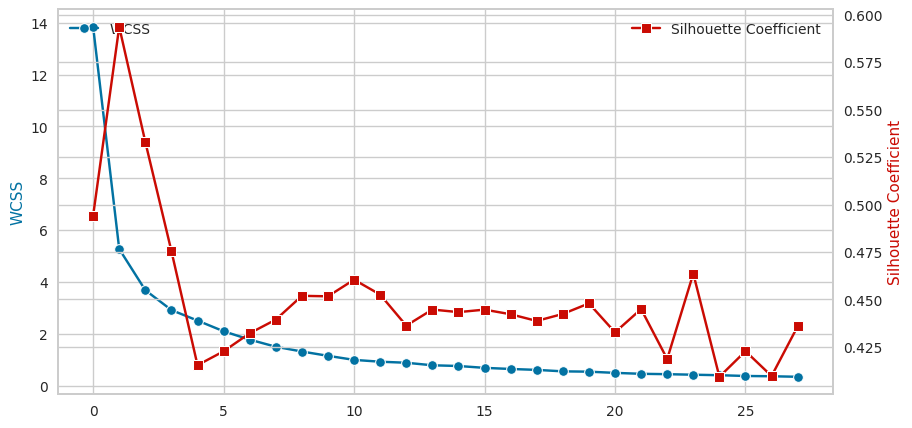

In [ ]:
# Create the first line plot with its own y-axis (left y-axis)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
ax1 = sns.lineplot( wcss, label='WCSS', marker='o', color='b')
ax1.set_ylabel('WCSS', color='b')

# Create the second line plot with its own y-axis (right y-axis)
ax2 = ax1.twinx()
sns.lineplot(sc, label='Silhouette Coefficient', marker='s', color='r')
ax2.set_ylabel('Silhouette Coefficient', color='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('kmeans', KMeans(n_clusters=3))])

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

<Axes: xlabel='PC1', ylabel='PC2'>

Text(0.5, 1.0, 'Clusters in PC1-PC2 space')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

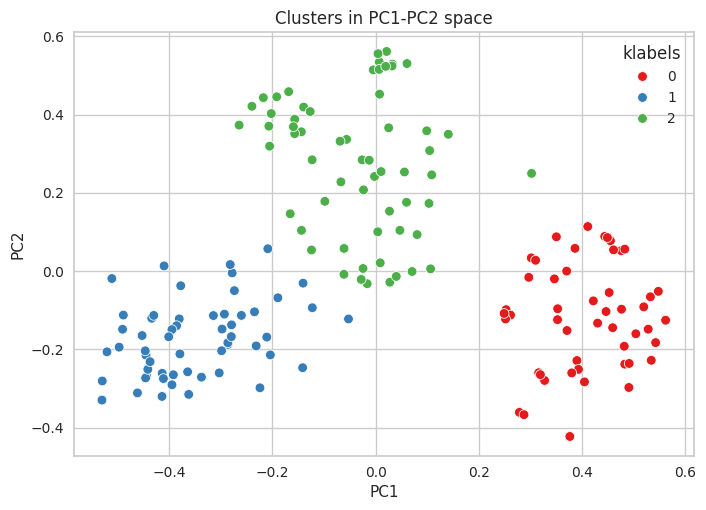

In [ ]:
from sklearn.pipeline import Pipeline
plkmeans = Pipeline(
    steps=([
    ('kmeans',KMeans(n_clusters=3, init='k-means++', ))
    ])
    )

plkmeans.fit(emb_split_df[['PC1','PC2']])
emb_split_df['klabels'] = plkmeans.predict(emb_split_df[['PC1', 'PC2']])

plkmeans[0].labels_

# Plotting using Seaborn
sns.scatterplot(data=emb_split_df, x='PC1', y='PC2', hue='klabels', palette='Set1')
plt.title('Clusters in PC1-PC2 space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

Text(0.5, 1.0, 'Clusters in PC1-PC2 space')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

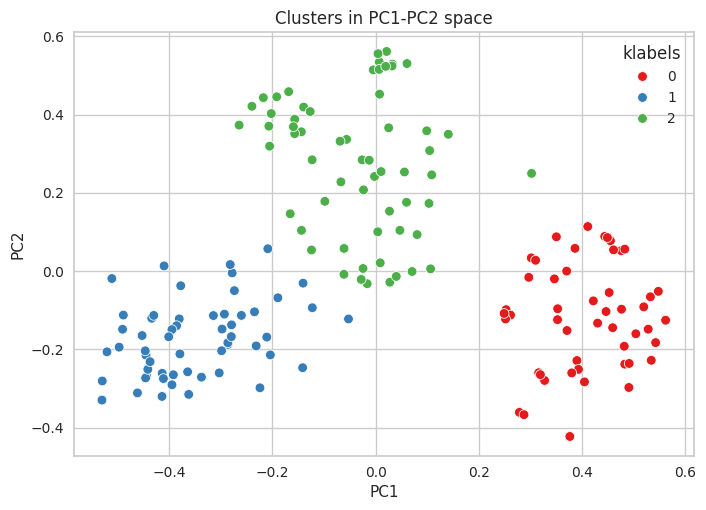

In [ ]:
emb_split_df[['PC1','PC2']]

,PC1,PC2
0,-0.234652,-0.104059
1,-0.413841,-0.320305
2,-0.530236,-0.329621
3,0.027648,-0.028372
4,-0.488782,-0.112366
...,...,...
164,0.346531,-0.019915
165,0.532581,-0.065710
166,0.251869,-0.122434
167,0.452652,-0.054735


In [ ]:
def cluster_predict(strings):
    """
    Cluster a list of strings using two models.

    Args:
    - strings (list): List of strings to be clustered.
    - model: The model used to encode strings.
    - model2: The model used for clustering.
    - num_clusters (int): Number of clusters.

    Returns:
    - cluster_matrix (numpy.ndarray): Matrix with one-hot encoded predictions of clusters.
    """
    #strings = list(set(strings) - {""})
    #print(strings)

    # Encode strings using model
    embeddings = [model.encode(strings)]

    df = pd.DataFrame(embeddings)

    print(df.shape)

    # Transpose the DataFrame to put items in different columns
    #df = df.transpose()

    # Rename columns if needed
    df.columns = [f'embedding_{i}' for i in range(len(df.columns))]

    #embeddings = [[[x] for x in sublist] for sublist in embeddings]


    # Predict clusters using model2
    predictions = plkmeans[0].predict(df)

    # Initialize cluster matrix
    #cluster_matrix = np.zeros((len(strings),19 ))

    # Fill cluster matrix with one-hot encoded predictions
    #for i, pred in enumerate(predictions):
    #    cluster_matrix[i, pred] = 1
    print(predictions)
    return predictions


In [ ]:
import shap

# Assuming cluster_df is your DataFrame containing cluster data
# Assuming model is your predictive model (e.g., a classifier)

# Example index of the element in the cluster
element_index = 0

# Extract text data for the element
# element_text = emb_split_df.iloc[element_index]['title']
element_text = "Lindt Lindor Pistachio"

# Initialize an explainer using SHAP
explainer = shap.Explainer(cluster_predict, emb_split_df['title'])

# Explain why the element belongs to its cluster
shap_values = explainer(element_text)

# Print the explanation
print(shap_values)

IndexError: tuple index out of range

In [ ]:
import numpy as np
from lime.lime_text import LimeTextExplainer

# Assuming cluster_df is your DataFrame containing cluster data
# Assuming model is your predictive model (e.g., a classifier)

# Example index of the element in the cluster
element_index = 0

# Extract text data for the element
#element_text = emb_split_df.iloc[element_index]['title']
element_text = "Lindt Lindor Pistachio"

# Initialize LIME explainer for text data
explainer = LimeTextExplainer(class_names=emb_split_df['labels'].unique())

# Explain why the element belongs to its cluster
explanation = explainer.explain_instance(element_text, cluster_strings)

# Print explanation
print(explanation.as_list())


(5000, 768)
[('Lindt', 0.0), ('Lindor', 0.0), ('Pistachio', 0.0)]


In [ ]:
explanation

In [ ]:
import numpy as np

def cluster_strings(strings):
    """
    Cluster a list of strings using two models.

    Args:
    - strings (list): List of strings to be clustered.
    - model: The model used to encode strings.
    - model2: The model used for clustering.
    - num_clusters (int): Number of clusters.

    Returns:
    - cluster_matrix (numpy.ndarray): Matrix with one-hot encoded predictions of clusters.
    """
    #strings = list(set(strings) - {""})
    #print(strings)

    # Encode strings using model
    embeddings = [model.encode(string) for string in strings]

    df = pd.DataFrame(embeddings)

    print(df.shape)

    # Transpose the DataFrame to put items in different columns
    #df = df.transpose()

    # Rename columns if needed
    df.columns = [f'embedding_{i}' for i in range(len(df.columns))]

    #embeddings = [[[x] for x in sublist] for sublist in embeddings]


    # Predict clusters using model2
    predictions = plkmeans[0].predict(df)

    # Initialize cluster matrix
    cluster_matrix = np.zeros((len(strings),19 ))

    # Fill cluster matrix with one-hot encoded predictions
    for i, pred in enumerate(predictions):
        cluster_matrix[i, pred] = 1

    return cluster_matrix


In [ ]:
 for string in element_text.split(" "):print(string)

Dove
Deo
Spray
Original


In [ ]:
element_text
cluster_strings(element_text)

'Dove Deo Spray Original'

(4, 768)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]])

In [ ]:
#float_list = [a]
a = model.encode("Lindt Lindor Pistachio")
#a
plkmeans[0].predict(df)

array([8], dtype=int32)

In [ ]:
my_list = [a]
# Convert the list into a DataFrame
df = pd.DataFrame(my_list)

# Transpose the DataFrame to put items in different columns
#df = df.transpose()

# Rename columns if needed
df.columns = [f'embedding_{i}' for i in range(len(df.columns))]

In [ ]:
df

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_758,column_759,column_760,column_761,column_762,column_763,column_764,column_765,column_766,column_767
0,-0.015595,0.002662,-0.038036,-0.027692,-0.021001,0.118097,0.029181,0.099825,-0.021346,-0.030687,...,-0.006692,0.031699,0.016582,0.019555,-0.007059,0.013624,-0.00682,0.001203,-0.004598,0.019584


In [ ]:
centroids.shape
labels

(19, 768)

array([14,  0,  0, 13, 12,  0,  0,  5,  5,  5, 16,  8,  5,  0,  5, 16, 14,
       16, 13, 16,  0, 13, 16, 18, 12,  0,  0,  0, 16, 16,  0, 12,  5,  0,
       13, 12,  0,  0,  3, 14, 12, 16,  3,  5, 16,  5, 12, 14, 18, 16, 12,
        5, 18, 14, 12, 12, 16,  0,  5, 13,  6,  7,  7,  6,  7,  7, 14,  6,
        6,  7, 11,  7,  4, 11,  6,  6,  4, 11,  1,  6, 11,  6,  1, 14, 11,
       17,  6, 11,  4,  9, 17,  6,  6, 11,  7, 11,  7,  6,  1,  1,  1,  6,
        1,  1,  9,  7,  7,  7,  6, 10, 10,  8,  3, 15,  2,  2,  8,  2, 15,
       15,  2, 15,  2, 15,  2,  8,  8,  3, 10, 15,  2,  2, 15,  2,  2,  8,
       15, 15,  8, 15, 15,  8,  8, 10,  8, 15,  2, 10, 10, 15,  7,  8, 10,
        2, 15, 10,  2,  8,  8,  3,  7,  7, 15,  8,  8, 15, 15, 15, 10],
      dtype=int32)

In [ ]:
drink_emb
#drink['rating'].str.extract(r'Rated  of (\d+)')

,web-scraper-order,web-scraper-start-url,title,rating,quantity,price,type,rate,votes,price_str,content,embedding
0,1708457095-1,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Prix Garantie Natural Mineral Water 6x1.5l,Rated of 5\n \n \n \n \n \n (63),9l,1.80,drink,5,63,Price is 1.80,Prix Garantie Natural Mineral Water 6x1.5l.Pri...,"[0.004055492, -0.0064663603, -0.020245017, -0...."
1,1708457095-2,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola Zero 6x1.5l,Rated of 5\n \n \n \n \n \n (...,9l,14.10,drink,5,186,Price is 14.10,Coca-Cola Zero 6x1.5l.Price is 14.10,"[-0.025023505, 0.004996396, -0.030919421, -0.0..."
2,1708457095-3,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola Zero 6x33cl,Rated of 5\n \n \n \n \n \n (77),198cl,6.20,drink,5,77,Price is 6.20,Coca-Cola Zero 6x33cl.Price is 6.20,"[-0.0118129905, 0.020423023, -0.038708575, -0...."
3,1708457095-4,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Valser Classic Carbonated Mineral Water 6x1.5l,Rated of 5\n \n \n \n \n \n (...,9l,6.90,drink,5,199,Price is 6.90,Valser Classic Carbonated Mineral Water 6x1.5l...,"[-0.01463392, 0.008387859, -0.049011484, -0.02..."
4,1708457095-5,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola Zero 6x50cl,Rated of 5\n \n \n \n \n \n (64),300cl,8.95,drink,5,64,Price is 8.95,Coca-Cola Zero 6x50cl.Price is 8.95,"[-0.009774269, 0.015693128, -0.040559538, -0.0..."
6,1708457095-7,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola Original 6x33cl,Rated of 5\n \n \n \n \n \n (85),198cl,6.20,drink,5,85,Price is 6.20,Coca-Cola Original 6x33cl.Price is 6.20,"[-0.01643161, 0.016811743, -0.035940852, -0.06..."
7,1708457095-8,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,FREE - Neo Dolce Gusto Recycling Bag,Rated of 5\n \n \n \n \n \n (1),1PCE,0.00,drink,5,1,Price is 0.00,FREE - Neo Dolce Gusto Recycling Bag.Price is ...,"[0.026291365, 0.020505346, -0.0029465912, -0.0..."
8,1708457095-9,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Swiss Alpina Blue Carbonated Mineral Water 6x1.5l,Rated of 5\n \n \n \n \n \n (...,9l,5.95,drink,5,188,Price is 5.95,Swiss Alpina Blue Carbonated Mineral Water 6x1...,"[-0.0029974184, 0.0044007213, -0.03248714, -0...."
9,1708457095-10,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,evian Non Carbonated Mineral Water 6x50cl,Rated of 5\n \n \n \n \n \n (60),300cl,5.60,drink,5,60,Price is 5.60,evian Non Carbonated Mineral Water 6x50cl.Pric...,"[0.014091952, -0.007414866, -0.046156373, -0.0..."
10,1708457095-11,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola 6x1.5l,Rated of 5\n \n \n \n \n \n (94),9l,14.10,drink,5,94,Price is 14.10,Coca-Cola 6x1.5l.Price is 14.10,"[-0.026993753, 0.0032832208, -0.034988236, -0...."


In [ ]:
choco = pd.read_csv('coopdata/choco.csv')
choco['type'] = 'choco'
choco['rate'] = choco['rating'].str.extract(r'Rated  of (\d+)')
choco['votes'] = choco['rating'].str.extract(r'\((\d+)\)')
choco['price'] = choco['price'].apply(lambda x: f'Price is {x:.2f}')
choco['content'] = choco['title'].astype(str) + '.' + choco['price']
choco['embedding'] = choco['title'].apply(lambda x: model.encode(str(x)))
#choco['embedding'] = choco['embedding'].apply(lambda x: torch.tensor(x))

#choco['embedding'] = choco['title'].apply(lambda x: model.encode(x, convert_to_tensor=True))

choco.head(2)


clean = pd.read_csv('coopdata/clean.csv')
clean.head(2)

drink = pd.read_csv('coopdata/drink.csv')

drink.head(2)


,web-scraper-order,web-scraper-start-url,title,price,rating,quantity,type,rate,votes,content,embedding
0,1708455255-1,https://www.coop.ch/en/food/sweets-snacks/choc...,Lindt Lindor Pistachio,Price is 9.95,Rated of 5\n \n \n \n \n \n (7),200g,choco,5,7,Lindt Lindor Pistachio.Price is 9.95,"[-0.015595439, 0.00266231, -0.038036313, -0.02..."
1,1708455255-2,https://www.coop.ch/en/food/sweets-snacks/choc...,Lindt Mini Pralinés Assorted,Price is 7.50,Rated of 5\n \n \n \n \n \n (15),100g,choco,5,15,Lindt Mini Pralinés Assorted.Price is 7.50,"[0.009366399, 0.009142298, -0.02745305, -0.003..."


,web-scraper-order,web-scraper-start-url,title,quantity,price,rating
0,1708456208-1,https://www.coop.ch/en/cosmetics-health/body-c...,Dove Deo Spray Original,150ml,4.95,Rated of 5\n \n \n \n \n \n (6)
1,1708456208-2,https://www.coop.ch/en/cosmetics-health/body-c...,Dettol Rejuvenating Liquid Hand Soap,250ml,4.20,Rated of 5\n \n \n \n \n \n (8)


,web-scraper-order,web-scraper-start-url,title,rating,quantity,price
0,1708457095-1,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Prix Garantie Natural Mineral Water 6x1.5l,Rated of 5\n \n \n \n \n \n (63),9l,1.80
1,1708457095-2,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola Zero 6x1.5l,Rated of 5\n \n \n \n \n \n (...,9l,14.10


In [ ]:
#torch.tensor(choco['embedding'][0])
choco['title'].apply(lambda x: model.encode(str(x)))
#.unsqueeze(target['a'], 0)


0     [-0.015595439, 0.00266231, -0.038036313, -0.02...
1     [0.009366399, 0.009142298, -0.02745305, -0.003...
2     [-0.030769339, -0.009651003, -0.05092889, -0.0...
3     [-0.027982878, -0.030485524, -0.018500287, -0....
4     [-0.045585535, 0.01699042, -0.04890954, -0.036...
5     [-0.045713287, -0.001207513, -0.047871828, -0....
6     [-0.03972447, 0.01345344, -0.01017691, -0.0188...
7     [-0.0066855997, 0.051840816, -0.01068577, -0.0...
8     [-0.05306688, 0.027094541, -0.030130757, -0.03...
9     [-0.033351433, -0.026875129, -0.019211626, -0....
10    [-0.04460597, 0.018419577, -0.047773447, -0.03...
11    [-0.051164176, -0.009208962, -0.04071964, -0.0...
12    [-0.03970941, 0.013690429, -0.006839268, -0.01...
13    [-0.04284415, -0.023947867, -0.030873815, -0.0...
14    [-0.05541725, -0.0068277065, -0.0062016784, -0...
15    [-0.041399375, 9.548766e-05, -0.053549107, 0.0...
16    [-0.040304564, 0.015669353, -0.058209855, -0.0...
17    [-0.031110087, -0.0059274617, -0.047741607

In [ ]:
def get_column_info(df):
    # Calculate null values, total values, and column types for each column
    null_values = df.isnull().sum()
    total_values = df.shape[0]
    column_types = df.dtypes

    # Create a new DataFrame with column names, null values, total values, and column types
    result_df = pd.DataFrame({
        'Column Name': null_values.index,
        'Null Values': null_values.values,
        'Total Values': [total_values] * len(null_values),
        'Column Type': [str(x) for x in column_types]
    })

    return result_df

dir = 'coopdata'
for i in [choco,clean,drink]:
  get_column_info(i)

,Column Name,Null Values,Total Values,Column Type
0,web-scraper-order,0,60,object
1,web-scraper-start-url,0,60,object
2,title,0,60,object
3,price,0,60,float64
4,rating,0,60,object
5,quantity,0,60,object


,Column Name,Null Values,Total Values,Column Type
0,web-scraper-order,0,60,object
1,web-scraper-start-url,0,60,object
2,title,0,60,object
3,quantity,0,60,object
4,price,0,60,float64
5,rating,0,60,object


,Column Name,Null Values,Total Values,Column Type
0,web-scraper-order,0,55,object
1,web-scraper-start-url,0,55,object
2,title,6,55,object
3,rating,0,55,object
4,quantity,0,55,object
5,price,0,55,object


In [ ]:
model = SentenceTransformer("all-distilroberta-v1")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:

clean = pd.read_csv('coopdata/clean.csv')
clean.head(2)

drink = pd.read_csv('coopdata/drink.csv')
drink.head(2)

def remove_null_title(df):
  df = df.dropna(subset=['title'])
  return df

drink.dropna(subset=['title'])
#drink = remove_null_title(drink)

,web-scraper-order,web-scraper-start-url,title,quantity,price,rating
0,1708456208-1,https://www.coop.ch/en/cosmetics-health/body-c...,Dove Deo Spray Original,150ml,4.95,Rated of 5\n \n \n \n \n \n (6)
1,1708456208-2,https://www.coop.ch/en/cosmetics-health/body-c...,Dettol Rejuvenating Liquid Hand Soap,250ml,4.20,Rated of 5\n \n \n \n \n \n (8)


,web-scraper-order,web-scraper-start-url,title,rating,quantity,price
0,1708457095-1,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Prix Garantie Natural Mineral Water 6x1.5l,Rated of 5\n \n \n \n \n \n (63),9l,1.80
1,1708457095-2,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola Zero 6x1.5l,Rated of 5\n \n \n \n \n \n (...,9l,14.10


,web-scraper-order,web-scraper-start-url,title,rating,quantity,price
0,1708457095-1,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Prix Garantie Natural Mineral Water 6x1.5l,Rated of 5\n \n \n \n \n \n (63),9l,1.80
1,1708457095-2,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola Zero 6x1.5l,Rated of 5\n \n \n \n \n \n (...,9l,14.10
2,1708457095-3,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola Zero 6x33cl,Rated of 5\n \n \n \n \n \n (77),198cl,6.20
3,1708457095-4,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Valser Classic Carbonated Mineral Water 6x1.5l,Rated of 5\n \n \n \n \n \n (...,9l,6.90
4,1708457095-5,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola Zero 6x50cl,Rated of 5\n \n \n \n \n \n (64),300cl,8.95
6,1708457095-7,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola Original 6x33cl,Rated of 5\n \n \n \n \n \n (85),198cl,6.20
7,1708457095-8,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,FREE - Neo Dolce Gusto Recycling Bag,Rated of 5\n \n \n \n \n \n (1),1PCE,0.00
8,1708457095-9,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Swiss Alpina Blue Carbonated Mineral Water 6x1.5l,Rated of 5\n \n \n \n \n \n (...,9l,5.95
9,1708457095-10,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,evian Non Carbonated Mineral Water 6x50cl,Rated of 5\n \n \n \n \n \n (60),300cl,5.60
10,1708457095-11,https://www.coop.ch/en/food/drinks/c/m_2242?q=...,Coca-Cola 6x1.5l,Rated of 5\n \n \n \n \n \n (94),9l,14.10


In [ ]:
a = model.encode("Lindt Lindor Pistachio", convert_to_tensor=True)
b = model.encode("Lindt Mini Pralinés Assorted", convert_to_tensor=True)
c = model.encode("Prix Garantie Natural Mineral Water 6x1.5l", convert_to_tensor=True)
d = model.encode("Coca-Cola Zero 6x1.5l", convert_to_tensor=True)
e = model.encode("Dettol Rejuvenating Liquid Hand Soap",convert_to_tensor=True)
f = model.encode("Dove Deo Spray Original",convert_to_tensor=True)

In [ ]:
a

tensor([-1.5595e-02,  2.6623e-03, -3.8036e-02, -2.7692e-02, -2.1001e-02,
         1.1810e-01,  2.9181e-02,  9.9825e-02, -2.1346e-02, -3.0687e-02,
         2.8025e-03, -2.1946e-02,  2.4672e-02,  8.5684e-03, -1.2937e-01,
         1.1458e-01,  6.5863e-02, -5.9899e-02, -3.0706e-02, -1.3919e-02,
        -3.0452e-02, -2.9986e-02,  4.1397e-02,  4.1840e-02,  4.6515e-03,
         1.7183e-02, -1.0763e-02, -4.1340e-02,  1.7561e-02, -1.1822e-02,
        -1.0519e-02, -6.0160e-02, -1.3531e-02,  2.4985e-02,  1.9350e-02,
         2.5379e-02, -8.7064e-03, -5.8880e-03, -2.9393e-02, -2.6948e-02,
        -9.5126e-03, -2.5045e-02, -5.1788e-02,  7.5003e-02, -2.3401e-02,
        -4.5974e-03, -8.7185e-03, -4.5306e-02,  3.0707e-03,  2.8437e-02,
        -4.4702e-02,  3.4588e-02, -2.3673e-02, -1.3780e-03, -3.7895e-02,
         7.4315e-03,  2.2244e-02, -2.4929e-02, -3.1321e-02, -4.5292e-02,
        -5.3461e-02,  8.7219e-02, -1.3190e-02, -3.9750e-02,  5.7760e-02,
        -4.4699e-02, -3.4665e-03, -2.1928e-02,  3.3

In [ ]:
util.dot_score(a,b)
util.dot_score(a,c)
util.dot_score(a,d)
util.dot_score(c,d)
util.dot_score(c,b)
util.dot_score(c,a)
util.dot_score(e,d)
util.dot_score(e,b)
util.dot_score(e,a)
util.dot_score(e,c)

util.dot_score(f,a)
util.dot_score(f,b)
util.dot_score(f,c)
util.dot_score(f,d)
util.dot_score(f,e)



tensor([[0.4947]])

tensor([[0.1305]])

tensor([[0.1580]])

tensor([[0.4794]])

tensor([[0.1522]])

tensor([[0.1305]])

tensor([[0.1216]])

tensor([[0.0028]])

tensor([[0.0896]])

tensor([[0.1845]])

tensor([[0.2127]])

tensor([[0.1020]])

tensor([[0.2795]])

tensor([[0.3129]])

tensor([[0.3716]])

In [ ]:
util.cos_sim(a,b)
util.cos_sim(a,c)
util.cos_sim(a,d)
util.cos_sim(c,d)
util.cos_sim(c,b)
util.cos_sim(c,a)

util.cos_sim(e,d)
util.cos_sim(e,b)
util.cos_sim(e,a)
util.cos_sim(e,c)

tensor([[0.4947]])

tensor([[0.1305]])

tensor([[0.1580]])

tensor([[0.4794]])

tensor([[0.1522]])

tensor([[0.1305]])

tensor([[0.1216]])

tensor([[0.0028]])

tensor([[0.0896]])

tensor([[0.1845]])

In [ ]:
https://www.dropbox.com/scl/fi/lt7mbtho9d3n9guh9cz2k/coopdata.zip?rlkey=m501w6zggiugila3zps1jfbql&dl=0